## Tariff Effects on Consumer Prices



Note 06/06/2025:
1. Downloading USITC import data of **dutiable** consumption goods from https://dataweb.usitc.gov/ : Custom Value, First Unit of Quantity, CIF Import Value of year 2017, 2019 and 2024 for 
- Agregation of all countries
- China, Canada, Mexica, Vietnam and India

### Step 1. Data processing

#### 1.1. USITC data (Si Qin)

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
# Load the USITC data from xlsx file 'Customs Value' 'First Unit of Quantity' 'CIF Import Value' tabs, sorted by HTS Number
all_customs = pd.read_excel('../data/raw/USITC_data/Allcountry-DataWeb-Query-Export.xlsx', sheet_name='Customs Value')
all_quantity = pd.read_excel('../data/raw/USITC_data/Allcountry-DataWeb-Query-Export.xlsx', sheet_name='First Unit of Quantity')
all_CIF = pd.read_excel('../data/raw/USITC_data/Allcountry-DataWeb-Query-Export.xlsx', sheet_name='CIF Import Value')
five_customs = pd.read_excel('../data/raw/USITC_data/5country_DataWeb-Query-Export.xlsx', sheet_name='Customs Value')
five_quantity = pd.read_excel('../data/raw/USITC_data/5country_DataWeb-Query-Export.xlsx', sheet_name='First Unit of Quantity')
five_CIF = pd.read_excel('../data/raw/USITC_data/5country_DataWeb-Query-Export.xlsx', sheet_name='CIF Import Value')

/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/Si/miniforge3/envs/aienv/lib/

In [3]:
all_customs = all_customs.sort_values(by=['HTS Number','Year'], ascending=True)
all_quantity = all_quantity.sort_values(by=['HTS Number','Year'], ascending=True)
all_CIF = all_CIF.sort_values(by=['HTS Number','Year'], ascending=True)
five_customs = five_customs.sort_values(by=['HTS Number','Country','Year'], ascending=True)
five_quantity = five_quantity.sort_values(by=['HTS Number','Country','Year'], ascending=True)
five_CIF = five_CIF.sort_values(by=['HTS Number','Country','Year'], ascending=True)

In [4]:
### Combine all countries data with the other five countries data, keep only HTS data that have China data (all three years 2017, 2019 and 2024 data)
# Add Country to all countries data
all_customs['Country'] = all_quantity['Country'] = all_CIF['Country'] ='All'
# Combine and clean the data
# customs = pd.concat([all_customs,five_customs],ignore_index=True).sort_values(by=['HTS Number','Country','Year'], ascending=True)
# df = customs
def combine_all_five (all_data, five_data):
	df = pd.concat([all_data,five_data],ignore_index=True).sort_values(by=['HTS Number','Country','Year'], ascending=True)
	# print(df.head(10))

	df = df[df['Year'].notna()]  # Remove rows where Year is NaN
	df['HTS Number'] = df['HTS Number'].astype(int)
	df['Year'] = df['Year'].astype(int)
	df['Country'] = df['Country'].astype(str).str.strip().str.lower()

	df = df[~df['Quantity Description'].str.contains('no units collected',case=False, na=False)]
	# also delete 'Value for: ' in 'Quantity Description' to make the datasets uniform
	df['Quantity Description'] = df['Quantity Description'].str.replace(r'^Value for:\s*', '', regex=True)

	china_data = df[df['Country']=='china']
	china_years = china_data.groupby('HTS Number')['Year'].apply(set).reset_index()
	hts_with_china_all_years = china_years[china_years['Year'].apply(lambda x: {2017, 2019, 2024}.issubset(x))]['HTS Number']

	df_sel = df[df['HTS Number'].isin(hts_with_china_all_years)]
	return df_sel

customs0 = combine_all_five(all_customs, five_customs)
quantity0 = combine_all_five(all_quantity, five_quantity)
cif0 = combine_all_five(all_CIF, five_CIF)

In [5]:
# # some Chinese goods have different tariffs, part exempted, part dutible. To simplify the calculation, aggreagate the custom value of the same goods
# customs = customs0.groupby(['HTS Number', 'Country', 'Year', 'Description', 'Quantity Description'], as_index=False)['Customs Value'].sum()

In [6]:
# # Show full rows and all columns
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', 0)

# print(customs0.shape)
# print(customs.shape)
# # print(customs.info())
# customs.head(10)

In [7]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')

In [8]:
# Drop 'Suppressed' column
quantity0 = quantity0.drop(columns='Suppressed')
# Now inspect the quantity data
print(quantity0.shape)
quantity0.head(10)

(48110, 8)


,Data Type,HTS Number,Year,Description,RPC Description,Quantity Description,First Unit of Quantity,Country
121,First Unit of Quantity,20810,2017,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...",61 - Dutiable HS chapters 1-97,pounds,2.432084e+06,all
122,First Unit of Quantity,20810,2019,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","69 - Dutiable- HS chapter 99, duty reported",pounds,1.106717e+06,all
123,First Unit of Quantity,20810,2019,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","79 - Dutiable HS Chapter 99, no duty reported",pounds,5.132135e+04,all
124,First Unit of Quantity,20810,2019,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...",61 - Dutiable HS chapters 1-97,pounds,1.014392e+06,all
125,First Unit of Quantity,20810,2024,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","69 - Dutiable- HS chapter 99, duty reported",pounds,1.251287e+06,all
126,First Unit of Quantity,20810,2024,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...",61 - Dutiable HS chapters 1-97,pounds,1.689874e+06,all
26325,First Unit of Quantity,20810,2017,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...",61 - Dutiable HS chapters 1-97,pounds,2.029518e+06,china
26326,First Unit of Quantity,20810,2019,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","69 - Dutiable- HS chapter 99, duty reported",pounds,1.106717e+06,china
26327,First Unit of Quantity,20810,2019,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","79 - Dutiable HS Chapter 99, no duty reported",pounds,5.132135e+04,china
26328,First Unit of Quantity,20810,2024,"RABBIT OR HARE MEAT AND EDIBLE OFFAL, FRESH, C...","69 - Dutiable- HS chapter 99, duty reported",pounds,1.251287e+06,china


In [9]:
# inspect the CIF data
print(cif0.shape)
cif0.tail(10)

(48110, 8)


,Data Type,HTS Number,Year,Description,RPC Description,Quantity Description,CIF Import Value,Country
71372,CIF Import Value,962000,2019,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES",61 - Dutiable HS chapters 1-97,number,11382,china
71374,CIF Import Value,962000,2019,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES","69 - Dutiable- HS chapter 99, duty reported",number,15738492,china
71376,CIF Import Value,962000,2019,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES","79 - Dutiable HS Chapter 99, no duty reported",number,8599503,china
71377,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES","69 - Dutiable- HS chapter 99, duty reported",number,19110297,china
71378,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES","79 - Dutiable HS Chapter 99, no duty reported",number,6424392,china
71380,CIF Import Value,962000,2019,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES",61 - Dutiable HS chapters 1-97,number,187412,india
71382,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES",61 - Dutiable HS chapters 1-97,number,2273242,india
71384,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES",61 - Dutiable HS chapters 1-97,number,8373,mexico
71385,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES","70 - Dutiable HS Chapters 1-97, no duty reported",number,86550,mexico
71386,CIF Import Value,962000,2024,"MONOPODS, BIPODS, TRIPODS AND SIMILIAR ARTICLES",61 - Dutiable HS chapters 1-97,number,2668074,vietnam


There is problem on the quantity description, some use number, some use actual unit such as pound, we need to inspect within the duplicate and clean up the duplicates.

In [10]:
print(quantity0.columns)
print(cif0.columns)
# Merge quantity and CIF data together to obtain CIF value per item
key_col = list((set(quantity0.columns) & set(cif0.columns)) - {'Quantity Description', 'Data Type'})
print(key_col)

# check duplications
print(quantity0.duplicated(subset=key_col).sum())
print(cif0.duplicated(subset=key_col).sum())


Index(['Data Type', 'HTS Number', 'Year', 'Description', 'RPC Description',
       'Quantity Description', 'First Unit of Quantity', 'Country'],
      dtype='object')
Index(['Data Type', 'HTS Number', 'Year', 'Description', 'RPC Description',
       'Quantity Description', 'CIF Import Value', 'Country'],
      dtype='object')
['Year', 'HTS Number', 'RPC Description', 'Country', 'Description']
2460
2460


In [11]:
# # inspect duplications
# qty_dup = quantity0[quantity0.duplicated(subset=key_col, keep=False)].sort_values(by=key_col)
# print(qty_dup.head()) # the duplicates are in the 'Quantity Description (qty)' columns
# print(quantity0['Quantity Description'].value_counts())
# print(cif0['Quantity Description'].value_counts())
df = quantity0
grouped = df.groupby(key_col)['Quantity Description'].unique().reset_index()
# Optional: Filter for groups with more than one unique description
grouped['n_unique'] = grouped['Quantity Description'].apply(len)
duplicates_with_multiple_units = grouped[grouped['n_unique'] > 1]
print(duplicates_with_multiple_units.shape)
# Convert lists to tuples for counting unique combinations
desc_tuples = duplicates_with_multiple_units['Quantity Description'].apply(tuple)
print(len(desc_tuples.value_counts()))
print(desc_tuples.value_counts().to_string())

(2185, 7)
109
Quantity Description
(number, pounds)                               693
(dozens, number)                               201
(pounds, square yards)                         173
(pounds, number)                               155
(dozens, number, pounds)                        53
(dozen pairs, dozens)                           47
(number, dozens)                                47
(cubic yards, pounds)                           43
(number, thousand units)                        39
(pounds, thousand units)                        39
(pounds, yards)                                 38
(number, pieces)                                38
(gallon, pounds)                                37
(dozens, pounds)                                37
(square yards, pounds)                          36
(gross, number, pounds)                         30
(barrels, pounds)                               29
(pounds, short ton)                             28
(gross, number)                                

Ok, there are 109 types of combinations of units for the same good, to simplify the problem, we will just aggregate the quantities together regarless their acutal units


In [12]:
# Merge customs, quantity and cif data together
merged = pd.merge(
	quantity0.drop(columns='Data Type', errors='ignore'),
	customs0.drop(columns='Data Type', errors='ignore'),  
	on=key_col + ['Quantity Description'], 
	how='outer'
	)
merged = pd.merge(merged, cif0.drop(columns='Data Type', errors='ignore'), on=key_col + ['Quantity Description'], how='outer')

In [13]:
print(merged.shape)

(48110, 9)


In [14]:
# Convert value columns to numeric before aggregation
merged['CIF Import Value'] = pd.to_numeric(merged['CIF Import Value'], errors='coerce')
merged['Customs Value'] = pd.to_numeric(merged['Customs Value'], errors='coerce')

# aggregate the quantities together for the same goods from the same country in the same year under the same RPC
aggregated = merged.groupby(key_col, as_index=False)[
    ['First Unit of Quantity', 'CIF Import Value', 'Customs Value']
].sum()

aggregated = aggregated[aggregated['First Unit of Quantity'] > 0]
aggregated['CIF per unit'] = (aggregated['CIF Import Value']/aggregated['First Unit of Quantity']).round(3)

In [15]:
print(aggregated.shape)

(45646, 9)


In [16]:
pd.options.display.float_format = '{:.3f}'.format
aggregated[aggregated['Country'] == 'china'].iloc[8000:8050,:]

,Year,HTS Number,RPC Description,Country,Description,First Unit of Quantity,CIF Import Value,Customs Value,CIF per unit
30491,2024,284020,"69 - Dutiable- HS chapter 99, duty reported",china,"BORATES, NESOI",2223066.056,2891446,2555483,1.301
30494,2024,284030,"69 - Dutiable- HS chapter 99, duty reported",china,PEROXOBORATES (PERBORATES),1231015.716,647707,578475,0.526
30498,2024,284150,"69 - Dutiable- HS chapter 99, duty reported",china,"CHROMATES AND DICHROMATES, NESOI; PEROXOCHROMATES",220.462,3172,2522,14.388
30500,2024,284150,"79 - Dutiable HS Chapter 99, no duty reported",china,"CHROMATES AND DICHROMATES, NESOI; PEROXOCHROMATES",160291.306,486996,475596,3.038
30504,2024,284169,"69 - Dutiable- HS chapter 99, duty reported",china,"MANGANITES, MANGANATES AND PERMANGANATES, NESOI",6247793.872,5640394,5485909,0.903
30506,2024,284169,"79 - Dutiable HS Chapter 99, no duty reported",china,"MANGANITES, MANGANATES AND PERMANGANATES, NESOI",35794.210,31232,31230,0.873
30508,2024,284170,61 - Dutiable HS chapters 1-97,china,MOLYBDATES (MOLYBDENUM CONTENT),287028.296,3515745,3462810,12.249
30511,2024,284180,61 - Dutiable HS chapters 1-97,china,TUNGSTATES (WOLFRAMATES),2068799.976,28435242,28324041,13.745
30515,2024,284180,"69 - Dutiable- HS chapter 99, duty reported",china,TUNGSTATES (WOLFRAMATES),90058.727,1288533,1288081,14.308
30521,2024,284190,"69 - Dutiable- HS chapter 99, duty reported",china,"SALTS OF OXOMETALLIC OR PEROXOMETALLIC ACIDS, ...",1884861.915,2815767,2492688,1.494


In [17]:
aggregated[aggregated['Country'] == 'china']['RPC Description'].unique()

array(['61 - Dutiable HS chapters 1-97',
       '69 - Dutiable- HS chapter 99, duty reported',
       '70 - Dutiable HS Chapters 1-97, no duty reported',
       '79 - Dutiable HS Chapter 99, no duty reported'], dtype=object)

In [18]:
aggregated['RPC Description'].unique()

array(['61 - Dutiable HS chapters 1-97',
       '64 - Dutiable HS Chapters 1-97special rates',
       '69 - Dutiable- HS chapter 99, duty reported',
       '70 - Dutiable HS Chapters 1-97, no duty reported',
       '79 - Dutiable HS Chapter 99, no duty reported'], dtype=object)

In [19]:
key_col2 = [col for col in key_col if col != 'RPC Description']
gped = df.groupby(key_col2)['RPC Description'].unique().reset_index()
# Optional: Filter for groups with more than one unique description
gped['n_unique'] = gped['RPC Description'].apply(len)
duplicates_with_multiple_units = gped[gped['n_unique'] > 1]
print(duplicates_with_multiple_units.shape)
# Convert lists to tuples for counting unique combinations
desc_tuples = duplicates_with_multiple_units['RPC Description'].apply(tuple)
print(len(desc_tuples.value_counts()))
print(desc_tuples.value_counts().to_string())

(8519, 6)
90
RPC Description
(69 - Dutiable- HS chapter 99, duty reported, 79 - Dutiable HS Chapter 99, no duty reported)                                                                                                                                   1901
(61 - Dutiable HS chapters 1-97, 69 - Dutiable- HS chapter 99, duty reported, 79 - Dutiable HS Chapter 99, no duty reported)                                                                                                   1855
(61 - Dutiable HS chapters 1-97, 69 - Dutiable- HS chapter 99, duty reported)                                                                                                                                                   958
(69 - Dutiable- HS chapter 99, duty reported, 61 - Dutiable HS chapters 1-97)                                                                                                                                                   607
(79 - Dutiable HS Chapter 99, no duty reported, 69 - Dutiab

#### 1.2 Tariff Data (Si Qin)
Before 2018, Chinese goods entered the U.S. mostly under normal MFN rates (often 0–5% for many consumer products). In 2017, the USTR launched a Section 301 investigation into China’s practices related to intellectual property, technology transfer, and innovation. Section 301 of the U.S. Trade Act of 1974 allows the U.S. Trade Representative (USTR) to investigate and respond to unfair trade practices by other countries. As a result of that investigation, the U.S. imposed additional tariffs on Chinese goods starting in mid-2018, covering **four** escalating lists of products. These tariffs were on top of existing MFN (Most Favored Nation) tariff rates, which were typically low for Chinese consumer goods before this. Here’s the breakdown of the 2018 Section 301 tariff lists:

| List   | Effective Date            | Tariff Rate                                 | Coverage              |
|--------|---------------------------|---------------------------------------------|-----------------------|
| List 1 | July 6, 2018              | 25%                                         | ~$34B worth of goods  |
| List 2 | August 23, 2018           | 25%                                         | ~$16B                 |
| List 3 | September 24, 2018        | Initially 10%, raised to 25% in May 2019    | ~$200B                |
| List 4 | List 4A imposed Sept 2019 | 15% (later reduced to 7.5%)                 | ~$120B                |

We have collected these list and will add the tariff rate into our data set according to the HTS code.

In [20]:
# Load the MFN rate for 2017, 2019 and 2024
mfn2017 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2017/tariff_database_2017.txt')
mfn2019 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2019/trade_tariff_database_201811.txt')
mfn2024 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2024/trade_tariff_database_202405.txt')

def mfn_rate_extract(df, year):
	df['HTS6'] = df['hts8'].astype(str).str[:6]
	cols_to_keep = ["HTS6", "mfn_text_rate", "mfn_ad_val_rate", "mfn_specific_rate"]
	df_clean = df[cols_to_keep].copy()
	df_clean.columns = ['HTS6',f"MFN_text_{year}", f"MFN_adval_{year}",f"MFN_spec_{year}",]
	return(df_clean)

df_2017 = mfn_rate_extract(mfn2017, 17)
df_2019 = mfn_rate_extract(mfn2019, 19)
df_2024 = mfn_rate_extract(mfn2024, 24)

mfn_df = df_2017.merge(df_2019, on= 'HTS6', how='outer')
mfn_df = mfn_df.merge(df_2024, on='HTS6', how='outer')
mfn_df.head()


/var/folders/5d/cbb67ps96xzf_mkkq1h1145w0000gn/T/ipykernel_18620/3391971039.py:2: DtypeWarning: Columns (19,56,61,66,85,86,95,97,107) have mixed types. Specify dtype option on import or set low_memory=False.
  mfn2017 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2017/tariff_database_2017.txt')
/var/folders/5d/cbb67ps96xzf_mkkq1h1145w0000gn/T/ipykernel_18620/3391971039.py:3: DtypeWarning: Columns (19,56,61,66,85,86,95,97,107,111) have mixed types. Specify dtype option on import or set low_memory=False.
  mfn2019 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2019/trade_tariff_database_201811.txt')
/var/folders/5d/cbb67ps96xzf_mkkq1h1145w0000gn/T/ipykernel_18620/3391971039.py:4: DtypeWarning: Columns (19,61,66,85,86,95,107,111) have mixed types. Specify dtype option on import or set low_memory=False.
  mfn2024 = pd.read_csv('../data/raw/Tariff Data/tariff_data_2024/trade_tariff_database_202405.txt')


,HTS6,MFN_text_17,MFN_adval_17,MFN_spec_17,MFN_text_19,MFN_adval_19,MFN_spec_19,MFN_text_24,MFN_adval_24,MFN_spec_24
0,100111,0.65 cents/kg,0.000,0.006,0.65 cents/kg,0.000,0.006,0.65 cents/kg,0.000,0.006
1,100119,0.65 cents/kg,0.000,0.006,0.65 cents/kg,0.000,0.006,0.65 cents/kg,0.000,0.006
2,100191,2.8%,0.020,0.000,2.8%,0.020,0.000,2.8%,0.028,0.000
3,100199,0.35 cents/kg,0.000,0.004,0.35 cents/kg,0.000,0.004,0.35 cents/kg,0.000,0.004
4,100210,Free,0.000,0.000,Free,0.000,0.000,Free,0.000,0.000


In [21]:
# filter out mfn value bigger than 5 (500%) such as 9999, that would be other type of information, not needed here.
mfn_filtered = mfn_df[
    (mfn_df['MFN_adval_17'].notna() & (mfn_df['MFN_adval_17'] < 5)) &
    (mfn_df['MFN_adval_19'].notna() & (mfn_df['MFN_adval_19'] < 5)) &
    (mfn_df['MFN_adval_24'].notna() & (mfn_df['MFN_adval_24'] < 5))
]
print(mfn_df.shape)
print(mfn_filtered.shape)

(4704060, 10)
(2790418, 10)


In [22]:
# Check if hts number in aggregated data is also in mfn_filtered data 
hts_mfn = set(mfn_filtered['HTS6'].astype(str))
hts_agg = set(aggregated['HTS Number'].astype(str).str[:6])
print(len(hts_mfn), len(hts_agg))

# Identify which HTS numbers are missing in the MFN data
missing_hts = hts_agg - hts_mfn

# Output the number and the missing HTS numbers if any
missing_hts_count = len(missing_hts)
print(len(hts_agg), missing_hts_count)

missing_hts_df = aggregated[aggregated['HTS Number'].astype(str).str[:6].isin(missing_hts)][['HTS Number', 'Description']]
missing_hts_df.tail(50)

# Discard the missing HTS to simplify the task
agg_keep = aggregated[~aggregated['HTS Number'].astype(str).str[:6].isin(missing_hts)]
hts_agg_keep = set(agg_keep['HTS Number'].astype(str))
print(agg_keep.shape, len(hts_agg_keep))

hts_keep = set(mfn_filtered['HTS6'].astype(str)) & hts_agg_keep # hts_keep = hts_agg_keep = 2245
mfn_keep_df = mfn_filtered[mfn_filtered['HTS6'].astype(str).isin(hts_agg_keep)]
# mfn_keep_df.loc[:,['MFN_adval_17', 'MFN_adval_19', 'MFN_adval_24']] = mfn_keep_df[['MFN_adval_17', 'MFN_adval_19', 'MFN_adval_24']].apply(pd.to_numeric, errors='coerce')
mfn_avg = (
	mfn_keep_df.groupby('HTS6')[['MFN_adval_17', 'MFN_adval_19', 'MFN_adval_24', 'MFN_spec_17', 'MFN_spec_19', 'MFN_spec_24']]
	.mean()
	.reset_index()
	.sort_values(by=['MFN_adval_17', 'MFN_adval_19', 'MFN_adval_24', 'MFN_spec_17', 'MFN_spec_19', 'MFN_spec_24'], ascending=False)
)
print(len(hts_keep), mfn_avg.shape) 
mfn_avg.head(10)

5576 2356
2356 111
(43718, 9) 2245
2245 (2245, 7)


,HTS6,MFN_adval_17,MFN_adval_19,MFN_adval_24,MFN_spec_17,MFN_spec_19,MFN_spec_24
154,240120,0.467,0.438,0.467,0.494,0.487,0.496
115,200811,0.437,0.437,0.439,0.027,0.027,0.022
1453,640110,0.370,0.370,0.375,0.000,0.000,0.000
1289,611212,0.280,0.280,0.282,0.000,0.000,0.000
1286,611130,0.276,0.276,0.276,0.000,0.000,0.000
1455,640199,0.272,0.272,0.275,0.000,0.000,0.000
1457,640291,0.255,0.255,0.257,0.277,0.277,0.277
1292,611231,0.250,0.250,0.259,0.000,0.000,0.000
2088,870431,0.250,0.250,0.250,0.000,0.000,0.000
2089,870490,0.250,0.250,0.250,0.000,0.000,0.000


In [23]:
# Find tariff in Section 301 section
l1 = pd.read_csv('../data/raw/Tariff Data/tabula-2018_tarrif_HST_list1.csv', on_bad_lines='skip')
l2 = pd.read_csv('../data/raw/Tariff Data/tabula-2018_tarrif_HST_list2.csv', on_bad_lines='skip', skiprows=[1])
l3 = pd.read_csv('../data/raw/Tariff Data/tabula-2018_tarrif_HST_list3.csv', on_bad_lines='skip', header=2)
l3.columns = ['HTS','Product Description']
l4 = pd.read_csv('../data/raw/Tariff Data/tabula-2018_tarrif_HST_list4.csv', on_bad_lines='skip', header=None)

In [24]:
l4.head()

,0,1,2,3,4
0,0101.21.00,0105.14.00,0201.10.10,0202.20.02,0203.21.00
1,0101.29.00,0105.15.00,0201.10.50,0202.20.04,0203.22.10
2,0101.30.00,0105.94.00,0201.20.02,0202.20.06,0203.22.90
3,0101.90.30,0105.99.00,0201.20.04,0202.20.10,0204.10.00
4,0101.90.40,0106.11.00,0201.20.06,0202.20.30,0204.21.00


In [25]:
l1_hts = set(l1['HTS_Code'].dropna().astype(str).str.replace('.', '', regex=False).str[:6])
l2_hts = set(l2['HTSUS'].dropna().astype(str).str.replace('.', '', regex=False).str[:6])
l3_hts = set(l3['HTS'].dropna().astype(str).str.replace('.', '', regex=False).str[:6])
l4_hts = l4.values.flatten()
l4_hts = pd.Series(l4_hts).dropna().astype(str).str.replace('.', '', regex=False).str[:6]
len(l1_hts), len(l2_hts), len(l3_hts), len(l4_hts)

(560, 189, 2650, 3229)

In [26]:
# Build an add-on tariff pd dataset
l1_df = pd.DataFrame({'HTS': list(l1_hts), 'addonTariff': 0.25})
l2_df = pd.DataFrame({'HTS': list(l2_hts), 'addonTariff': 0.25})
l3_df = pd.DataFrame({'HTS': list(l3_hts), 'addonTariff': 0.25})
l4_df = pd.DataFrame({'HTS': l4_hts.unique(), 'addonTariff': 0.075})

addon_tariff_df = pd.concat([l1_df, l2_df, l3_df, l4_df], ignore_index=True)
# If there is duplicated HTS number, select the highest add-on tariff 
addon_tariff_df = addon_tariff_df.groupby('HTS', as_index=False)['addonTariff'].max() 
# addon_tariff_df['tariff_label'] = 1
addon_tariff_df.shape

(4615, 2)

In [27]:
addon_tariff_df.head()

,HTS,addonTariff
0,010121,0.075
1,010129,0.075
2,010130,0.075
3,010190,0.075
4,010221,0.075


In [28]:
addon_tariff_keep = addon_tariff_df[addon_tariff_df['HTS'].isin(hts_keep)]
addon_tariff_keep.shape

(1919, 2)

In [29]:
# Merge MFN and addon_tariff datasets
tariff_df = pd.merge(mfn_avg, addon_tariff_keep, how='left', left_on='HTS6', right_on='HTS')
tariff_df['addonTariff'] = tariff_df['addonTariff'].fillna(0)
tariff_df = tariff_df.drop(columns='HTS')

In [30]:
tariff_df.head()

,HTS6,MFN_adval_17,MFN_adval_19,MFN_adval_24,MFN_spec_17,MFN_spec_19,MFN_spec_24,addonTariff
0,240120,0.467,0.438,0.467,0.494,0.487,0.496,0.250
1,200811,0.437,0.437,0.439,0.027,0.027,0.022,0.250
2,640110,0.370,0.370,0.375,0.000,0.000,0.000,0.075
3,611212,0.280,0.280,0.282,0.000,0.000,0.000,0.075
4,611130,0.276,0.276,0.276,0.000,0.000,0.000,0.075


In [31]:
# Adding tariff together to obtain the final tariff, 2019 and 2024 will calculate the add on tariff
tariff_df['ctrf_17'] = tariff_df['MFN_adval_17'] # ctrf: China temporary tarrif under Sectino 301
tariff_df['ctrf_19'] = tariff_df['MFN_adval_19'] + tariff_df['addonTariff']
tariff_df['ctrf_24'] = tariff_df['MFN_adval_24'] + tariff_df['addonTariff']
tariff_df = tariff_df.drop(columns=['addonTariff'])
print(tariff_df.shape)
tariff_df.tail()

## Tariff for chinese imports are under ctrf: China temporary tarrif under Sectino 301
## Canada and Mexico are under USMCA (formerly NAFTA), with preferential rates, tarrif using MFN_spec
## India and Vietnam using MFN_adval value as tarrif


(2245, 10)


,HTS6,MFN_adval_17,MFN_adval_19,MFN_adval_24,MFN_spec_17,MFN_spec_19,MFN_spec_24,ctrf_17,ctrf_19,ctrf_24
2240,100590,0.000,0.000,0.000,0.002,0.002,0.002,0.000,0.000,0.000
2241,100390,0.000,0.000,0.000,0.001,0.001,0.001,0.000,0.250,0.250
2242,230620,0.000,0.000,0.000,0.001,0.001,0.001,0.000,0.250,0.250
2243,820590,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.250
2244,910119,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.075,0.075


Merge Tariff df with the HTS data. note: 
- '61 - Dutiable HS chapters 1-97': normal MFN (Most-Favored-Nation) rates
- '64 - Dutiable HS Chapters 1-97special rates' : Dutiable with special rates (rare cases).
- '69 - Dutiable- HS chapter 99, duty reported' : Special tariff in Section 301 
- '70 - Dutiable HS Chapters 1-97, no duty reported' : tariff = 0
- '79 - Dutiable HS Chapter 99, no duty reported' : tariff = 0

In [32]:
# Convert the wide table to long table with year add-in 
tariff_long_df = pd.wide_to_long(
    tariff_df,
    stubnames=['MFN_adval', 'MFN_spec', 'ctrf'],
    i='HTS6',
    j='Year',
    sep='_',
    suffix='\\d+'
).reset_index()

# Map short year codes to full years
year_map = {'17': 2017, '19': 2019, '24': 2024}
tariff_long_df['Year'] = tariff_long_df['Year'].astype(str).map(year_map)
tariff_long_df.tail()

,HTS6,Year,MFN_adval,MFN_spec,ctrf
6730,100590,2024,0.000,0.002,0.000
6731,100390,2024,0.000,0.001,0.250
6732,230620,2024,0.000,0.001,0.250
6733,820590,2024,0.000,0.000,0.250
6734,910119,2024,0.000,0.000,0.075


**ctrf** stands for 'China temporary tarrif under Sectino 301'

In [33]:
agg_keep.head()
agg_keep.shape, tariff_long_df.shape

((43718, 9), (6735, 5))

In [34]:
# Count how many rows match
print("Canada :", agg_keep[agg_keep['Country'] == 'canada']['RPC Description'].value_counts())
print("Mexico :", agg_keep[agg_keep['Country'] == 'mexico']['RPC Description'].value_counts())
print("Vietnam :", agg_keep[agg_keep['Country'] == 'vietnam']['RPC Description'].value_counts())
print("India :", agg_keep[agg_keep['Country'] == 'india']['RPC Description'].value_counts())

Canada : RPC Description
61 - Dutiable HS chapters 1-97                      4753
69 - Dutiable- HS chapter 99, duty reported           43
70 - Dutiable HS Chapters 1-97, no duty reported      15
79 - Dutiable HS Chapter 99, no duty reported         12
Name: count, dtype: int64
Mexico : RPC Description
61 - Dutiable HS chapters 1-97                      3941
69 - Dutiable- HS chapter 99, duty reported           41
79 - Dutiable HS Chapter 99, no duty reported         12
70 - Dutiable HS Chapters 1-97, no duty reported       4
Name: count, dtype: int64
Vietnam : RPC Description
61 - Dutiable HS chapters 1-97                      3284
69 - Dutiable- HS chapter 99, duty reported           62
79 - Dutiable HS Chapter 99, no duty reported         17
70 - Dutiable HS Chapters 1-97, no duty reported       3
Name: count, dtype: int64
India : RPC Description
61 - Dutiable HS chapters 1-97                      5423
69 - Dutiable- HS chapter 99, duty reported           97
79 - Dutiable HS Chapter

In [35]:
# Merge USITC data with tariff data, 

agg_tariff = agg_keep.copy()
agg_tariff['HTS Number'] = agg_tariff['HTS Number'].astype(str)

usitc_tariff = pd.merge(
    agg_tariff,
    tariff_long_df,
    how='left',
    left_on=['HTS Number', 'Year'],
    right_on=['HTS6', 'Year']
)

# Define RPC mapping logic
def assign_tariff(row):
    if '61 - Dutiable HS chapters 1-97' in row['RPC Description']:
        if row['Country'] in ['canada', 'mexico']:
            return row['MFN_spec'] if not pd.isna(row['MFN_spec']) else row['MFN_adval']
        else:
            return row['MFN_adval']
    elif '64 - Dutiable HS Chapters 1-97special rates' in row['RPC Description']:
        return row['MFN_spec']
    elif '69 - Dutiable- HS chapter 99, duty reported' in row['RPC Description']:
        return row['ctrf']
    elif '70 - Dutiable HS Chapters 1-97, no duty reported' in row['RPC Description']:
        return 0
    elif '79 - Dutiable HS Chapter 99, no duty reported' in row['RPC Description']:
        return 0
    else:
        return None

# Apply tariff mapping
usitc_tariff['Applied Tariff'] = usitc_tariff.apply(assign_tariff, axis=1)
usitc_tariff = usitc_tariff.drop(columns=['HTS6','MFN_adval','MFN_spec','ctrf'])
usitc_tariff = usitc_tariff.sort_values(by=['Country', 'Customs Value'], ascending=[True, False])
# usitc_tariff.to_csv('../data/processed/usitc_tariff.csv')

print(usitc_tariff.shape)


(43718, 10)


In [36]:
usitc_tariff.head()

,Year,HTS Number,RPC Description,Country,Description,First Unit of Quantity,CIF Import Value,Customs Value,CIF per unit,Applied Tariff
9466,2017,870323,61 - Dutiable HS chapters 1-97,all,PASSENGER MOTOR VEHICLES WITH SPARK-IGNITION I...,3820768.000,61663052446,60319792562,16138.916,0.020
25896,2019,870323,61 - Dutiable HS chapters 1-97,all,PASSENGER MOTOR VEHICLES WITH SPARK-IGNITION I...,3510772.000,60326732531,58886577765,17183.324,0.020
42426,2024,870323,61 - Dutiable HS chapters 1-97,all,PASSENGER MOTOR VEHICLES WITH SPARK-IGNITION I...,2332807.000,51693904080,50778034807,22159.529,0.025
11310,2019,271019,61 - Dutiable HS chapters 1-97,all,"PETROLEUM OILS, OILS FROM BITUMINOUS MINERALS ...",480893390.208,29780138997,28433269546,61.927,0.015
741,2017,271019,61 - Dutiable HS chapters 1-97,all,"PETROLEUM OILS, OILS FROM BITUMINOUS MINERALS ...",547679415.470,26920739552,25577155710,49.154,0.015


In [37]:
# Summary top imports from china in different years with applied tariff 
# Filter China data
china_df = usitc_tariff[usitc_tariff['Country'] == 'china']

# Group by year and HTS number
top_imports = (
    china_df.groupby(['Year', 'HTS Number', 'Description','CIF per unit'],)
    .agg({
        'Customs Value': 'sum',
        'First Unit of Quantity': 'sum',
        'Applied Tariff': 'median'
    })
    .reset_index()
)

# For each year, get top 10 by customs value
top_customs_summary = (
    top_imports.sort_values(['Year', 'Customs Value'], ascending=[True, False])
    .groupby('Year')
    .head(10)
)
top_customs_summary.to_csv('../data/processed/china_top_import_HTS.csv')

top_tariff_summary = (
    top_imports.sort_values(['Year', 'Applied Tariff'], ascending=[True, False])
    .groupby('Year')
    .head(10)
)
top_tariff_summary.to_csv('../data/processed/china_top_tariff_HTS.csv')

In [38]:
top_tariff_summary

,Year,HTS Number,Description,CIF per unit,Customs Value,First Unit of Quantity,Applied Tariff
164,2017,240120,"TOBACCO, PARTLY OR WHOLLY STEMMED/STRIPPED",1.588,1040449,674829.773,0.467
120,2017,200811,"PEANUTS (GROUND-NUTS), PREPARED OR PRESERVED, ...",0.611,8042084,14093648.439,0.437
1465,2017,640110,WATERPROOF FOOTWEAR WITH BONDED OR CEMENTED OU...,20.203,12025602,659573.000,0.370
1300,2017,611212,"TRACK SUITS, WARM-UP SUITS AND JOGGING SUITS O...",24.203,9433206,410337.000,0.280
1297,2017,611130,BABIES' GARMENTS AND CLOTHING ACCESSORIES OF S...,16.152,162950864,10381752.000,0.276
1467,2017,640199,WATERPROOF FOOTWEAR WITH BONDED OR CEMENTED OU...,7.736,6018419,829380.000,0.272
1469,2017,640291,"FOOTWEAR, WITH OUTER SOLES AND UPPERS OF RUBBE...",9.829,855275290,91120303.000,0.255
1303,2017,611231,"MEN'S OR BOYS' SWIMWEAR OF SYNTHETIC FIBERS, K...",47.035,7424788,163706.000,0.250
2100,2017,870431,"MOTOR VEHICLES FOR GOODS TRANSPORT NESOI, WITH...",9797.852,941740,108.000,0.250
2101,2017,870490,TRUCKS/MOTOR VEHICLES FOR THE TRANSPORT OF GOO...,16656.380,3366406,208.000,0.250


In [39]:
# Check the trend of First Unit of Quantity, Customs value and CIF per unit change from 2017 to 2019 to 2024. Compare all countries, china, canada, mexico, vietanam and india
trend_summary = usitc_tariff.groupby(['Country', 'Year']).agg({
    'First Unit of Quantity': 'sum',
    'Customs Value': 'sum',
    'CIF per unit': 'median',
		'Applied Tariff': 'median',
}).reset_index()

trend_summary

,Country,Year,First Unit of Quantity,Customs Value,CIF per unit,Applied Tariff
0,all,2017,142747506676.877,493949453733,4.104,0.039
1,all,2019,243565493773.625,576179095876,4.816,0.040
2,all,2024,300807822030.792,674954861754,5.657,0.047
3,canada,2017,462080574.137,4203051496,23.649,0.000
4,canada,2019,3388231105.175,7220928008,21.449,0.000
5,canada,2024,1162938587.929,8627747582,29.543,0.000
6,china,2017,77894319928.420,155013333001,3.652,0.040
7,china,2019,142707307089.251,172612257817,5.142,0.050
8,china,2024,175146046280.354,176538635125,5.759,0.058
9,india,2017,3066012539.977,12815694546,7.576,0.043


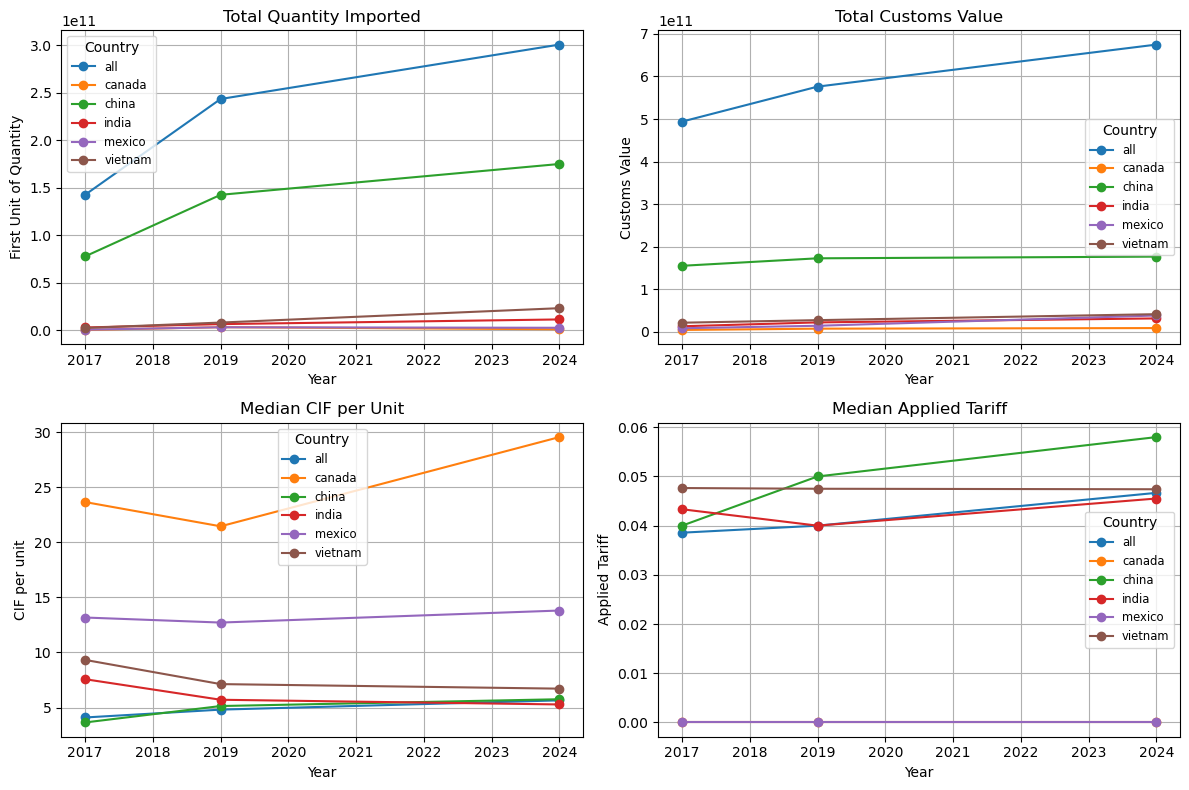

In [40]:
# plot all 4 features compare countries along the time

# Create a grid of plots for each feature over time
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
features = ['First Unit of Quantity', 'Customs Value', 'CIF per unit', 'Applied Tariff']
titles = ['Total Quantity Imported', 'Total Customs Value', 'Median CIF per Unit', 'Median Applied Tariff']

for ax, feature, title in zip(axs.flatten(), features, titles):
    for country in trend_summary['Country'].unique():
        data = trend_summary[trend_summary['Country'] == country]
        ax.plot(data['Year'], data[feature], marker='o', label=country)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.grid(True)
    ax.legend(title='Country', fontsize='small')

plt.tight_layout()

plt.savefig("../figures/usitc_plot.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()

In [41]:
### Viz top 7 customs value goods per country on graph Applied tarrif as x-axis and CIF per items as y-axis

# Filter out rows with missing country or customs value
df_filtered = usitc_tariff[usitc_tariff["Country"].notnull() & (usitc_tariff["Country"] != "all")]

# # For simplicity, limit to one year (latest available)
# latest_year = df_filtered["Year"].max()
years = [2017, 2019, 2024]
# Global min and max across all selected years
global_min = df_filtered[df_filtered["Year"].isin(years)]["Customs Value"].min()
global_max = df_filtered[df_filtered["Year"].isin(years)]["Customs Value"].max()

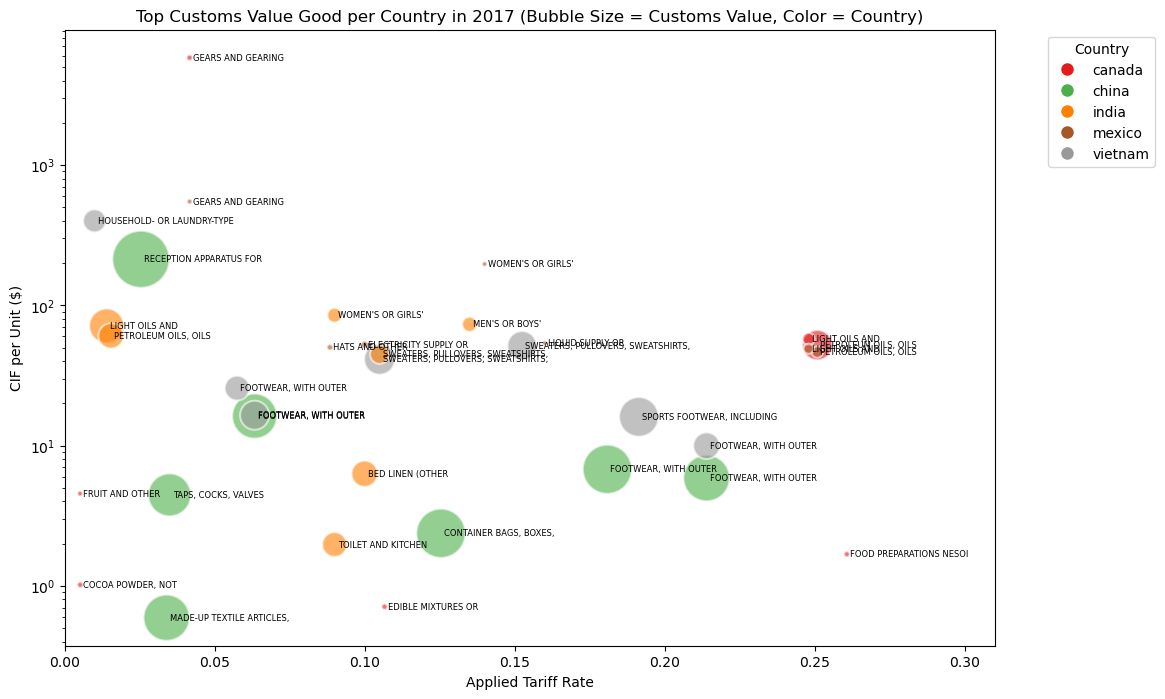

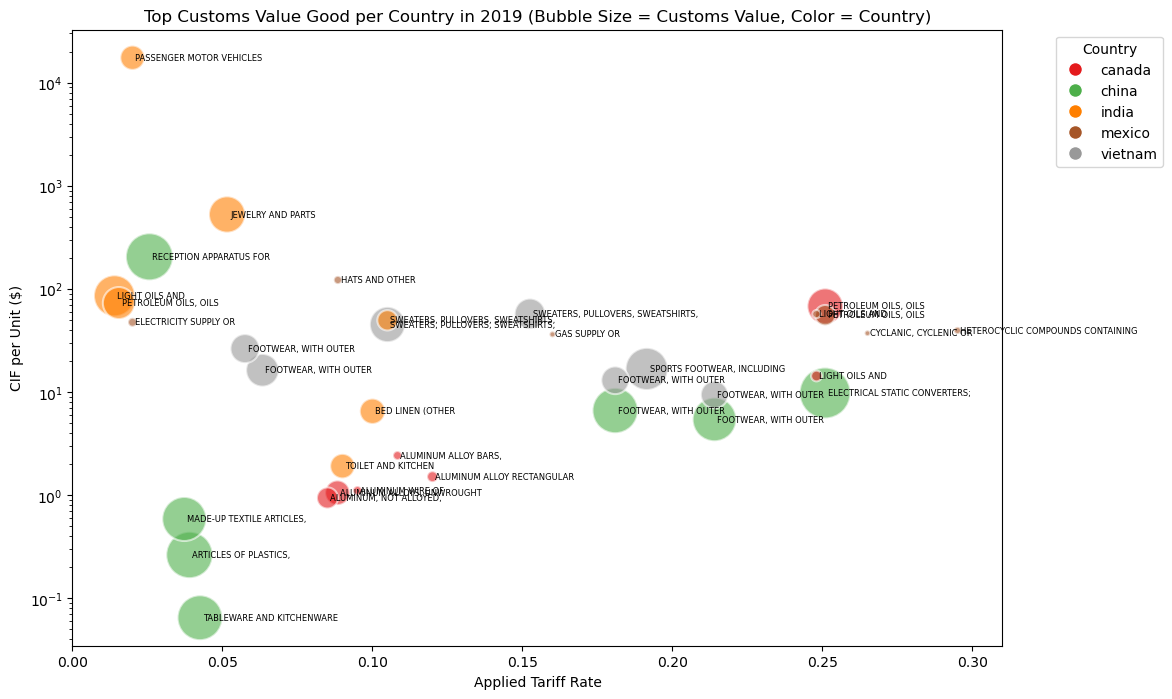

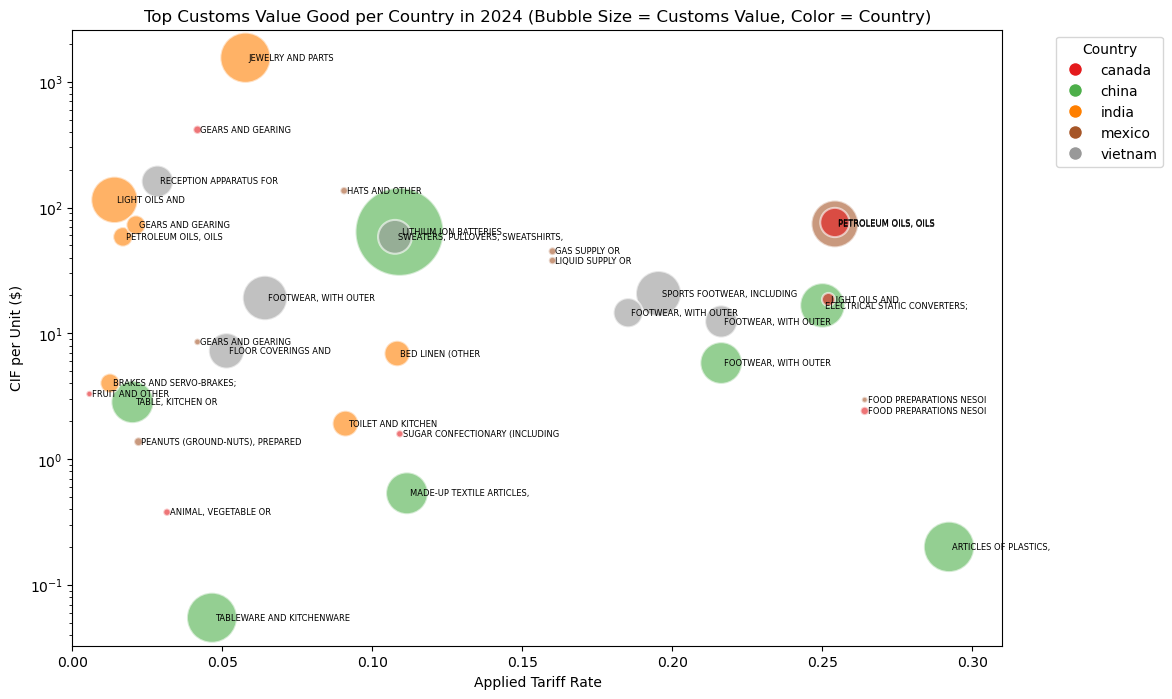

In [42]:
# Remove rows where description contains the word "cigarette" or "tobacco" (case insensitive)
df_filtered = df_filtered[~df_filtered["Description"].str.contains("cigarette|tobacco", case=False, na=False)]
for year in years:
    # Subset data for the current year
    df_bubble = df_filtered[df_filtered["Year"] == year].copy()

    # Remove rows with missing or zero values for plot variables
    df_bubble = df_bubble[
        (df_bubble["Applied Tariff"] > 0) &
        (df_bubble["CIF per unit"] > 0) &
        (df_bubble["Customs Value"] > 0)
    ]

    # Get top customs value item per country for the latest year
    top_per_country = (
        df_bubble.sort_values("Customs Value", ascending=False)
        .groupby("Country")
        .head(7)
        .reset_index(drop=True)
    )
    # # Extract the first part of the Description before comma
    # top_per_country["Label"] = top_per_country["Description"].apply(lambda x: x.split(",")[0])

    # Extract the first three words from the Description
    top_per_country["Label"] = top_per_country["Description"].apply(lambda x: " ".join(x.split()[:3]))
    from matplotlib.lines import Line2D

    # Recalculate log-scaled bubble sizes
    top_per_country["Customs Value"] = pd.to_numeric(top_per_country["Customs Value"], errors="coerce")
    bubble_sizes = top_per_country["Customs Value"]
    # bubble_sizes = np.log10(top_per_country["Customs Value"])
    # scaled_sizes = (bubble_sizes - bubble_sizes.min()) / (bubble_sizes.max() - bubble_sizes.min()) * 4000 +10
    scaled_sizes = (bubble_sizes - global_min) / (global_max - global_min) * 4000 + 10
    # Fix color mapping using sorted unique country list
    unique_countries = sorted(top_per_country["Country"].unique())
    color_palette = plt.cm.Set1(np.linspace(0, 1, len(unique_countries)))
    country_color_map = dict(zip(unique_countries, color_palette))
    top_per_country["Color"] = top_per_country["Country"].map(country_color_map)

    # Bubble plot
    fig, ax = plt.subplots(figsize=(12,8))
    country_codes, country_labels = pd.factorize(top_per_country["Country"])
    colors = country_codes

    scatter = ax.scatter(
        x=top_per_country["Applied Tariff"],
        y=top_per_country["CIF per unit"],
        s=scaled_sizes,
        c=top_per_country["Color"],
        alpha=0.6,
        edgecolors="white",
        linewidth=1.5
    )

    # Add labels (Description) to the right of each point
    y_offsets = np.linspace(-0.3, 0.3, len(top_per_country)) * 2500 / 10
    for i, (idx, row) in enumerate(top_per_country.iterrows()):
        ax.text(
            row["Applied Tariff"] + 0.001,
            row["CIF per unit"], # + y_offsets[i],
            row["Label"],
            fontsize=6,
            va='center'
        )
    ax.set_xlabel("Applied Tariff Rate")
    ax.set_ylabel("CIF per Unit ($)")
    ax.set_xlim(0, 0.31)      
    ax.set_title(f"Top Customs Value Good per Country in {year} (Bubble Size = Customs Value, Color = Country)")
    ax.set_yscale("log")

    # # Adjust to avoid overlapping
    # adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

    # Build matching legend with same color map
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=country,
            markerfacecolor=country_color_map[country], markersize=10)
        for country in unique_countries
    ]

    # Add properly aligned legend
    ax.legend(handles=legend_elements, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

    # plt.tight_layout()
    plt.savefig(f'../figures/bubble_chart_{year}.png')
    plt.show()

#### 2. CPI data (Andy Zhang & Si Qin)

Consumer CPI data is obtained from U.S. Bureau of Labory Statistics (BLS) public FTP server https://download.bls.gov/pub/time.series/cu/
The raw downloaded data include: 
1. cu.data.0.Current # Contains all current CPI data series
2. cu.series         # Metadata for each series

In [43]:
# Load data
cpi_data0 = pd.read_csv("../data/raw/CPI_data/cu.data.0.Current", sep='\t', engine='python')
cpi_meta = pd.read_csv("../data/raw/CPI_data/cu.series", sep='\t', engine='python')
cpi_data0.columns = cpi_data0.columns.str.strip()
cpi_meta.columns = cpi_meta.columns.str.strip()

In [44]:
print(cpi_data0.head())
print(cpi_data0.columns.tolist())
print(cpi_data0.shape)
print(len(cpi_data0['series_id'].unique()))
# print out all the years and periods
for col in ['year','period']:
	print(f"Unique values in {col}:")
	print(len(cpi_data0[col].unique()))
	print('=' * 40)

cpi_data0['period'].unique() # M13 is the annual average

           series_id  year period   value  footnote_codes
0  CUSR0000SA0        1997    M01 159.400             NaN
1  CUSR0000SA0        1997    M02 159.700             NaN
2  CUSR0000SA0        1997    M03 159.800             NaN
3  CUSR0000SA0        1997    M04 159.900             NaN
4  CUSR0000SA0        1997    M05 159.900             NaN
['series_id', 'year', 'period', 'value', 'footnote_codes']
(1107696, 5)
7935
Unique values in year:
29
Unique values in period:
16


array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'S01', 'S02', 'S03'], dtype=object)

In [45]:
print(cpi_meta.head())
cpi_meta.head()
#cpi_meta.shape
print(len(cpi_meta['series_id'].unique()))

           series_id area_code item_code seasonal periodicity_code base_code  \
0  CUSR0000SA0            0000       SA0        S                R         S   
1  CUSR0000SA0E           0000      SA0E        S                R         S   
2  CUSR0000SA0L1          0000     SA0L1        S                R         S   
3  CUSR0000SA0L12         0000    SA0L12        S                R         S   
4  CUSR0000SA0L12E        0000   SA0L12E        S                R         S   

   base_period                                       series_title  \
0  1982-84=100  All items in U.S. city average, all urban cons...   
1  1982-84=100  Energy in U.S. city average, all urban consume...   
2  1982-84=100  All items less food in U.S. city average, all ...   
3  1982-84=100  All items less food and shelter in U.S. city a...   
4  1982-84=100  All items less food, shelter, and energy in U....   

   footnote_codes  begin_year begin_period  end_year end_period  
0             NaN        1947         

In [46]:
# Extract the series id of U.S. city average, all urban consumers, and not seasonally adjusted
# also exclude all the services
service_keywords = ['services', 'transportation', 'medical', 'education', 'care', 'repair', 'rent', 'tuition', 'fare', 'postage', 'service', 'insurance', 'fee' , 'admission']
pattern = '|'.join(service_keywords)

unadjusted_id = cpi_meta['series_id'][
    cpi_meta['series_title'].str.contains('U.S. city average', case=False) &
    cpi_meta['series_title'].str.contains('all urban consumers', case=False) &
    (cpi_meta['seasonal'] == 'U') &        # Not seasonally adjusted    
    ~cpi_meta['series_title'].str.contains(pattern, case=False, na=False)
    ]

print(len(unadjusted_id))
# Aggregate the CPI data to annual price and use unadjusted value
unj_cpi_data = cpi_data0[cpi_data0['series_id'].isin(unadjusted_id) & (cpi_data0['period'] == 'M13')].drop(columns=['footnote_codes','period'])
print(unj_cpi_data.shape)
print(len(unj_cpi_data['series_id'].unique()))

573
(7729, 3)
290


In [47]:
# Targe label: Label big price increase (>5%) from 2017 to 2020 as 1, otherwise 0
# make wide table
wide_cpi = unj_cpi_data.pivot(index='series_id', columns='year', values='value').reset_index()
# add labels
wide_cpi['label'] = np.where((wide_cpi[2020]/wide_cpi[2017]-1) > 0.05, 1, 0)
print(wide_cpi['label'].value_counts())
# merge the description from meta data to the aggreaged data
cpi_all = pd.merge(wide_cpi, cpi_meta[['series_id','series_title']], on = 'series_id', how='left')

label
0    200
1     90
Name: count, dtype: int64


In [48]:
for title in cpi_all[cpi_all['label'] == 1]['series_title']:
    print(title)

All items - old base in U.S. city average, all urban consumers, not seasonally adjusted
All items in U.S. city average, all urban consumers, not seasonally adjusted
All items less food in U.S. city average, all urban consumers, not seasonally adjusted
All items less food and energy in U.S. city average, all urban consumers, not seasonally adjusted
All items less energy in U.S. city average, all urban consumers, not seasonally adjusted
Food and beverages in U.S. city average, all urban consumers, not seasonally adjusted
Food in U.S. city average, all urban consumers, not seasonally adjusted
Meats, poultry, fish, and eggs in U.S. city average, all urban consumers, not seasonally adjusted
Meats, poultry, and fish in U.S. city average, all urban consumers, not seasonally adjusted
Meats in U.S. city average, all urban consumers, not seasonally adjusted
Nonalcoholic beverages and beverage materials in U.S. city average, all urban consumers, not seasonally adjusted
Other goods in U.S. city av

Most of the items with more than 5% increase form 2017 to 2020 are food, housing. Relevent items to the goods imported from China are:  
- Appliances. 
- Major appliances. 
- Housekeeping supplies. 
- Household cleaning products. 
- Household paper products. 
- Household operations. 
- Sports vehicles including bicycles  
- Laundry equipment  
- Motor oil, coolant, and fluids  
- Vehicle parts and equipment other than tires 
- Infants' furniture 


In [49]:
# Define keyword groups for CPI categories
cpi_keywords = {
    "industrial_equipment": ["industrial","laboratory"],
    "appliances": [
    "appliance", "microwave", "oven", "refrigerator", "freezer",
    "dishwasher", "washer", "dryer", "cooking range", "toaster",
    "vacuum", "air conditioner", "dehumidifier"
    ],
    "major_appliances": ["major appliance", "refrigerator", "freezer", "dishwasher", "range"],
    "housekeeping_supplies": ["housekeeping", "household supply", "home cleaning"],
    "cleaning_products": ["cleaning", "detergent", "disinfectant", "cleanser"],
    "paper_products": ["toilet paper", "tissue", "paper towel", "napkin"],
    "household_operations": ["household operation", "domestic services"],
    "sports_vehicles": ["bicycle", "sports vehicle", "e-bike", "scooter"],
    "laundry_equipment": ["laundry", "washer", "dryer", "laundry equipment"],
    "vehicle_fluids": ["motor oil", "coolant", "brake fluid", "lubricant"],
    "vehicle_parts": ["vehicle part", "auto part", "car part", "equipment", "accessory"],
    "infants_furniture": ["crib", "infant furniture", "baby crib", "changing table"]
}
# Convert description to lowercase for case-insensitive matching
usitc_tf_cpi = usitc_tariff.copy()
usitc_tf_cpi["Description_lower"] = usitc_tf_cpi["Description"].str.lower()

# Initialize label column
usitc_tf_cpi["label"] = 0

# Match descriptions to keyword lists
for category, keywords in cpi_keywords.items():
    for keyword in keywords:
        match_mask = usitc_tf_cpi["Description_lower"].str.contains(keyword, na=False)
        usitc_tf_cpi.loc[match_mask, "label"] = 1
        usitc_tf_cpi.loc[match_mask, "matched_category"] = category

# Change 'industrial_equipment' category as 0
usitc_tf_cpi.loc[usitc_tf_cpi['matched_category'] == 'industrial_equipment', 'label'] = 0

print(usitc_tf_cpi[usitc_tf_cpi["label"] == 1]['matched_category'].value_counts())
print('-' * 50)
print(usitc_tf_cpi['label'].value_counts())

matched_category
appliances           4098
laundry_equipment     230
vehicle_parts         170
sports_vehicles       158
major_appliances      100
cleaning_products      69
infants_furniture      50
vehicle_fluids         29
paper_products         26
Name: count, dtype: int64
--------------------------------------------------
label
0    38788
1     4930
Name: count, dtype: int64


In [50]:
# keep only HTS and match info
matched_df = usitc_tf_cpi[usitc_tf_cpi["label"] == 1][["HTS Number", "Description", "matched_category"]].drop_duplicates()
# Drop misclassified textile items
filtered = matched_df[~matched_df["Description"].str.contains("woven|fabric|cotton|fiber", case=False, na=False)]

filtered.to_csv("../data/processed/matched_hts_to_cpi.csv", index=False)

So here we have CPI matched USITC data with tariff. Next we want to get the training dataset (baseline data before section 301 (2017)) to build and validate the classier models, then apply it on our new basline data (2024) to predict what imports especially from China will be likely affected. 

#### 3. Get clean training data and test data (Si Qin)

#### 3.1 Clean data and investigate potential important features

In [51]:
usitc_tf_cpi.head()
### Clean the datasets
data0 = usitc_tf_cpi.copy()
data0 = data0.drop(columns=['Description_lower','matched_category']) #'HTS Number','Description',
data0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43718 entries, 9466 to 2575
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    43718 non-null  int64  
 1   HTS Number              43718 non-null  object 
 2   RPC Description         43718 non-null  object 
 3   Country                 43718 non-null  object 
 4   Description             43718 non-null  object 
 5   First Unit of Quantity  43718 non-null  float64
 6   CIF Import Value        43718 non-null  int64  
 7   Customs Value           43718 non-null  int64  
 8   CIF per unit            43718 non-null  float64
 9   Applied Tariff          43718 non-null  float64
 10  label                   43718 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 4.0+ MB


In [52]:
# change object to number
col_obj_num = ['CIF Import Value', 'Customs Value', 'CIF per unit']
data0[col_obj_num] = data0[col_obj_num].apply(pd.to_numeric, errors = 'coerce')

# Remove 'all' as country
data0 = data0[data0["Country"].notnull() & (data0["Country"] != "all")].reset_index(drop=True)

# Rename 'RPC Description' to 'RPC'
data0.rename(columns={'RPC Description':'RPC'}, inplace=True)

# one-hot encoding category feature: Country and RPC Description
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['Country','RPC']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = encoder.fit_transform(data0[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert to DataFrame with column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))
# Combine with original dataframe (excluding original categorical columns)
data = pd.concat([data0.drop(columns=categorical_cols).reset_index(drop=True),
									encoded_df.reset_index(drop=True)], axis=1)

data.describe()

,Year,First Unit of Quantity,CIF Import Value,Customs Value,CIF per unit,Applied Tariff,label,Country_canada,Country_china,Country_india,Country_mexico,Country_vietnam,RPC_61 - Dutiable HS chapters 1-97,"RPC_69 - Dutiable- HS chapter 99, duty reported","RPC_70 - Dutiable HS Chapters 1-97, no duty reported","RPC_79 - Dutiable HS Chapter 99, no duty reported"
count,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000,29114.000
mean,2020.271,15900611.101,26718220.893,25437595.274,1673.760,0.064,0.108,0.166,0.391,0.191,0.137,0.116,0.734,0.155,0.002,0.109
std,2.908,506465869.267,162753642.021,156090816.498,24540.206,0.097,0.311,0.372,0.488,0.393,0.344,0.320,0.442,0.362,0.043,0.312
min,2017.000,0.071,252.000,251.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2017.000,1880.135,40315.250,37638.000,2.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2019.000,47221.858,410065.500,389510.500,7.697,0.026,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
75%,2024.000,805516.750,4831402.750,4603104.500,54.864,0.080,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
max,2024.000,63884899542.572,9737623254.000,9599639752.000,1572430.667,0.989,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


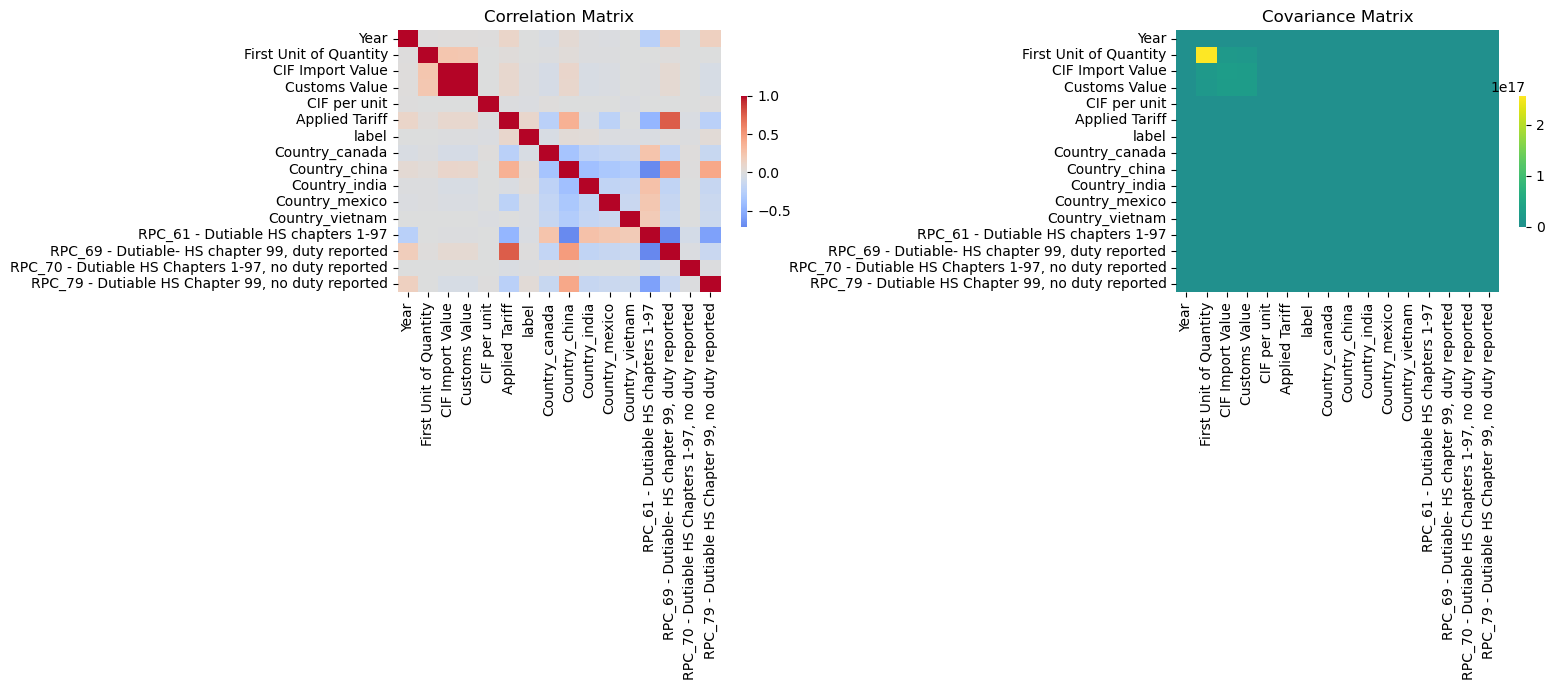

In [53]:
# Investigate the correlations or covariance among features
data1 = data.copy().drop(columns=['HTS Number','Description'])
corr_matrix = data1.corr(numeric_only=True)
cov_matrix = data1.cov()
# Plot heatmap
fig, axes = plt.subplots(1,2, figsize=(16, 7))
sns.heatmap(corr_matrix, ax=axes[0], cmap="coolwarm", center=0, annot=False, fmt=".2f", cbar_kws={"shrink": 0.5})
axes[0].set_title("Correlation Matrix")

sns.heatmap(cov_matrix, ax=axes[1], cmap="viridis", center=0, annot=False, fmt=".2f", cbar_kws={"shrink": 0.5})
axes[1].set_title("Covariance Matrix")

plt.tight_layout()
plt.show()

#### 3.2 Split data

In [54]:
# Training dataset is 2017 data and Test data set is 2024 data
trainset = data[data['Year'] == 2017].drop(columns='Year')
# trainset = data[data['Year'].isin([2017, 2019])] #.drop(columns='Year')
testset = data[data['Year'] == 2024].drop(columns='Year')

# Define the features and target variable
X = trainset.drop(columns=['label','HTS Number','Description'], axis=1)
y = trainset['label']

# define one-hot columns for downstream model build
cat_cols = [col for col in X.columns if col.startswith("RPC_") or col.startswith("Country_")]
rest_cols = [col for col in X.columns if col not in cat_cols]

#### 3.3 Using SelectKBest to investigate important features.   

In [55]:
# Import the necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to select the top 3 features
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(X, y)
# View the scores of the features, and their p-values
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_, 'P-Value': selector.pvalues_})
# Sort the features by score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
# Display the feature scores
print("Feature scores:\n", feature_scores)
print("Class distribution:", np.bincount(y))
print("Majority class accuracy:", max(np.mean(y), 1 - np.mean(y)))


Feature scores:
                                               Feature   Score  P-Value
4                                      Applied Tariff 158.934    0.000
7                                       Country_india  19.209    0.000
5                                      Country_canada  15.682    0.000
10                 RPC_61 - Dutiable HS chapters 1-97   4.465    0.035
6                                       Country_china   4.259    0.039
2                                       Customs Value   4.054    0.044
1                                    CIF Import Value   4.024    0.045
3                                        CIF per unit   2.963    0.085
9                                     Country_vietnam   2.754    0.097
8                                      Country_mexico   2.580    0.108
11    RPC_69 - Dutiable- HS chapter 99, duty reported   2.109    0.146
12  RPC_70 - Dutiable HS Chapters 1-97, no duty re...   1.874    0.171
0                              First Unit of Quantity   0.81

Observation: it appears Applied Tariff does have direct impact on the increase in the end prices, as reflected in the CPI.

### Step 2 Build and validate the 'best' model of classification (Si Qin)

#### 4 Model Building and Evaluation

The following models are selected for evaluation:
- Linear Classifier: Logistic Regression (used as a baseline), Supportive vector Classifier (SVC)
- Generative Method: Naive Bayes
- Discriminant Analysis: Linear Discriminant Analysis (LDA)
- Tree based Method: Decision Tree & Random Forest
- Graph based Method: K-Nearest Neighbors (KNN)
- Boosting Method: XGBoost
- Neural Network: Multi-layer Perceptron (MLPClassifier)

In [56]:
# Import the necessary libraries

# Evaluation & Validation
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, cross_validate
)
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use this if you want to apply SMOTE inside a pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# General
import time


In [80]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, stratify=y, random_state=24
) # add stratify to maintain the same proportion of classes in train and test sets


# Then oversample only on the training set
sm = SMOTE(random_state=24)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

label_train_rate = y_train.mean()
label_resampled_rate = y_resampled.mean()
label_test_rate =y_test.mean()
print("Label rate in training set (80% in train_data):", label_train_rate)
print("Label rate in testing set (20% in train_data):", label_test_rate)
print("Label rate in resampled set :", label_resampled_rate)

Label rate in training set (80% in train_data): 0.1046248382923674
Label rate in testing set (20% in train_data): 0.10478654592496765
Label rate in resampled set : 0.5


In [58]:
X_train.columns

Index(['First Unit of Quantity', 'CIF Import Value', 'Customs Value',
       'CIF per unit', 'Applied Tariff', 'Country_canada', 'Country_china',
       'Country_india', 'Country_mexico', 'Country_vietnam',
       'RPC_61 - Dutiable HS chapters 1-97',
       'RPC_69 - Dutiable- HS chapter 99, duty reported',
       'RPC_70 - Dutiable HS Chapters 1-97, no duty reported',
       'RPC_79 - Dutiable HS Chapter 99, no duty reported'],
      dtype='object')

In [84]:
# Define the classifiers
classifiers = {
	'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),			# didnot use: Use only numerical columns for the logistic regression model
	# 'SVM': SVC(class_weight='balanced', probability=True),			# This model is too slow and also the accuracy is terrible, not worth trying it
	# 'Naive Bayes': GaussianNB(),																# This model's accuracy is also terrible, drop it in the further test.	
	'LDA': LinearDiscriminantAnalysis(),
	'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
	'Random Forest': RandomForestClassifier(class_weight='balanced'),
	'XGBoost': XGBClassifier(class_weight='balanced', eval_metric='logloss'),
	'KNN': KNeighborsClassifier(),
	'MLP': MLPClassifier(max_iter=1000, early_stopping=True)
}

# Define the parameter grids for each classifier
grids = {
    'Logistic Regression': {
		'classifier__penalty': ['l2'], 
		'classifier__solver': ['lbfgs', 'saga'], 
		'classifier__C': [0.01, 0.1, 1, 10]
		},
    'SVM': {																																
			'classifier__C': [0.1, 1, 10], 
			'classifier__kernel': ['linear', 'rbf'],
			'classifier__gamma': ['scale', 'auto'],
			'classifier__max_iter': [1000, 3000]
			},
	'GaussianNB': {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]},						
	'LDA': [
			{'classifier__solver': ['svd']},
			{'classifier__solver': ['lsqr', 'eigen'], 'classifier__shrinkage': ['auto', None]}
			],
	'Decision Tree': {
			'classifier__max_depth': [3, 5, 10],
			'classifier__min_samples_split': [2, 5],
			'classifier__min_samples_leaf': [1, 2],
			'classifier__criterion': ['gini', 'entropy']
			},
    'Random Forest': {
			'classifier__n_estimators': [100, 200],
			'classifier__max_depth': [3, 5, 10],
			'classifier__min_samples_split': [2, 5],
			'classifier__min_samples_leaf': [1, 2],
			'classifier__criterion': ['gini', 'entropy']
			},
	'KNN': {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']},
	'XGBoost': {
			'classifier__n_estimators': [100, 200],
			'classifier__max_depth': [3, 5],
			'classifier__learning_rate': [0.01, 0.1]
			},
	'MLP': {
			'classifier__hidden_layer_sizes': [(50,), (100,), (50, 100)],
			'classifier__activation': ['relu', 'tanh'],
			'classifier__solver': ['adam', 'sgd'],
			'classifier__alpha': [0.0001, 0.001, 0.1],
			'classifier__learning_rate': ['constant', 'adaptive']
			}
}

# num_col = ['First Unit of Quantity', 'CIF Import Value', 'Customs Value', 'CIF per unit', 'Applied Tariff']

# Initialize a StratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=27)

preprocessor = ColumnTransformer(
transformers=[
	('num', StandardScaler(), rest_cols),  # Only scale numeric columns
	('cat', 'passthrough', cat_cols)      # Leave one-hot columns as-is
	])

# Define the cross-validation and model evaluation functions
def evaluate_model(classifiers, X_train, y_train, X_test, y_test, cv):

	# Initialize a list to store the results
	results_list = []

	# Loop through the classifiers
	for name, clf in classifiers.items():
		# Create a pipeline with scaling and the classifier
		pipeline = ImbPipeline([
			('scaler', preprocessor),
			('smote', SMOTE(random_state=27)), 		# Adding SMOTE for imbalanced data
			('classifier', clf)
		])
		
		# Define the parameter grid for GridSearchCV
		param_grid = grids.get(name)

		# Start the timer
		start_time = time.time()

		if param_grid is not None:
			# Model tuning: Used RandomizedSearchCV to optimize the hyperparameters of the classifier.
			grid = RandomizedSearchCV(
				pipeline,
				param_grid,
				cv=cv,
				scoring={'F1': 'f1', 'Accuracy': 'accuracy', 'Precision': 'precision', 'roc_auc': 'roc_auc'},
				refit='F1',  # Use 'F1' as the metric to refit on
				n_jobs=-1
			)
			# if name != 'Logistic Regression':
			grid.fit(X_train, y_train)
			# # For logistic regression
			# else:
				# grid.fit(X_train[num_col],y_train)

			best_estimator = grid.best_estimator_
			raw_params = grid.best_params_
			best_params = {k.replace('classifier__', ''): v for k, v in raw_params.items()}

		else:
			pipeline.fit(X_train, y_train)
			best_estimator = pipeline
			best_params = None

		# Cross-validate on the training set to get metric distributions
		cv_results = cross_validate(
			best_estimator, X_train, y_train, cv=cv,
			scoring={'f1': 'f1', 'accuracy': 'accuracy', 'precision': 'precision', 'roc_auc': 'roc_auc'},
			n_jobs=1, return_train_score=False
		)
		acc_scores = cv_results['test_accuracy']
		f1_scores = cv_results['test_f1'] # F1 score for each validation fold within X_train set -- not the X_test set
		prec_scores = cv_results['test_precision']
		rocauc_scores = cv_results['test_roc_auc']

		# Evaluate on the test set
		# if name == 'Logistic Regression':
		# 	y_pred = best_estimator.predict(X_test[num_col])
		# else:
		y_pred = best_estimator.predict(X_test)
		# Ensure y_pred and y_test have the same length
		assert len(y_pred) == len(y_test), f"y_pred ({len(y_pred)}) and y_test ({len(y_test)}) must be the same length"
		test_acc = accuracy_score(y_test, y_pred)
		test_f1 = f1_score(y_test, y_pred, zero_division=0)
		test_prec = precision_score(y_test, y_pred, zero_division=0)
		test_auc = roc_auc_score(y_test, y_pred) #if 'roc_auc' in cv_results else "Not available"


		# Feature importances or coefficients
		feature_names = X_train.columns.tolist()
		model = best_estimator.named_steps['classifier']
		# Check if the model has feature importances or coefficients
		if hasattr(model, 'feature_importances_'):
			importances = model.feature_importances_
			top_features = sorted(zip(feature_names, importances), key=lambda x: -x[1])[:5]
		elif hasattr(model, 'coef_'):
			coefs = np.abs(model.coef_[0])
			top_features = sorted(zip(feature_names, coefs), key=lambda x: -x[1])[:5]
		elif isinstance(model, GaussianNB):
			mean_diff = np.abs(model.theta_[0] - model.theta_[1])
			avg_std = np.sqrt((model.var_[0] + model.var_[1]) / 2)
			feature_importance = mean_diff / avg_std
			top_features = sorted(zip(feature_names, feature_importance), key=lambda x: -x[1])[:5]
		else:
			perm = permutation_importance(best_estimator, X_train, y_train, n_repeats=10, random_state=27, n_jobs=-1)
			# Use permutation importance if the model does not have feature importances or coefficients
			# Note: This may take longer to compute
			importances = perm.importances_mean
			top_features = sorted(zip(feature_names, importances), key=lambda x: -x[1])[:5]
					
		# Calculate the run time
		end_time = time.time()
		run_time = round(end_time - start_time, 2)

		# Append the results to the list
		results_list.append({
			'Classifier': name,
			'CV Acc Mean ± Std': f"{np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}",
			'CV F1 Mean ± Std': f"{np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}",
			'CV Prec Mean ± Std': f"{np.mean(prec_scores):.3f} ± {np.std(prec_scores):.3f}",
			'CV ROC AUC Mean ± Std': f"{np.mean(rocauc_scores):.3f} ± {np.std(rocauc_scores):.3f}",
			'Test Accuracy': test_acc,
			'Test F1': test_f1,
			'Test Precision': test_prec,
			'Test ROC AUC': test_auc,
			'Run Time (s)': run_time,
			'Top Features': top_features,
			'Best Parameters': best_params
		})

	# Convert the results list to a DataFrame and sort by test accuracy
	results = pd.DataFrame(results_list).sort_values(by='CV F1 Mean ± Std', ascending=False)

	# Clean up 'Top Features' to show values with 2 decimal points
	# Define a function to format the top features
	def format_top_features(feature_list):
		return [(name, round(float(score), 2)) for name, score in feature_list]
	results['Top Features'] = results['Top Features'].apply(format_top_features)

	return results

# Evaluate the models
results = evaluate_model(classifiers, X_train, y_train, X_test, y_test, cv)
print("Model evaluation results (CV and Test):\n", results.to_markdown(index=False, tablefmt="grid"))

/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Si/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Si/miniforge3

Model evaluation results (CV and Test):
 +---------------------+---------------------+--------------------+----------------------+-------------------------+-----------------+-----------+------------------+----------------+----------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------+
| Classifier          | CV Acc Mean ± Std   | CV F1 Mean ± Std   | CV Prec Mean ± Std   | CV ROC AUC Mean ± Std   |   Test Accuracy |   Test F1 |   Test Precision |   Test ROC AUC |   Run Time (s) | Top Features                                                                                                                                                                                     | Best Parameters                                      

Obeservation: 
- Tree models and KNN show the highest accuracy, F1 score and ROC AUC. F1 score are pretty low.
- In most of the model, applied Tariff play the most important role in price increase.
- Due to imbalanced data (positive label 11.3%), we will also be using F1 to optimize the top tree models and KNN with the best parameters.

In [85]:
from sklearn.metrics import precision_recall_curve

# Define models and their best-known parameters
model_defs = {
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='logloss', random_state=24),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy', random_state=24),
    "Decision Tree": DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=3, criterion='gini', random_state=24),
    "MLP": MLPClassifier(max_iter=1000, early_stopping=True, solver='adam', learning_rate= 'adaptive', hidden_layer_sizes= (50,100), alpha=0.001, activation='relu'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs', penalty='l2', C=0.1)
}

# Threshold optimizer
def optimize_threshold(y_true, y_probs):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=24)
results = []

# Loop over models
for name, model in model_defs.items():
    f1_scores = []
    thresholds = []

    pipeline = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTE(random_state=24)), 		# Adding SMOTE for imbalanced data
    ('classifier', model)
    ])

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tra, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tra, y_val = y.iloc[train_idx], y.iloc[val_idx]

        
        pipeline.fit(X_tra, y_tra)
        y_probs = pipeline.predict_proba(X_val)[:, 1]
        best_thresh, best_f1 = optimize_threshold(y_val, y_probs)

        f1_scores.append(best_f1)
        thresholds.append(best_thresh)

    results.append({
        "Model": name,
        "Mean F1 Score": np.mean(f1_scores),
        "Std F1 Score": np.std(f1_scores),
        "Mean thresholds": np.mean(thresholds)
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by="Mean F1 Score", ascending=False)
results_df

,Model,Mean F1 Score,Std F1 Score,Mean thresholds
1,Random Forest,0.495,0.046,0.663
0,XGBoost,0.480,0.048,0.628
2,Decision Tree,0.461,0.041,0.880
3,MLP,0.437,0.039,0.644
4,KNN,0.383,0.039,0.824
5,Logistic Regression,0.375,0.045,0.570


Optimizting threshold marginly improves the F1 scores. Try ensemble models.

In [86]:
# from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
from itertools import combinations

In [90]:
### Build cross validation for ensemble models -- voting 'soft' and stacking

best_models = {
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='logloss', random_state=24),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy', random_state=24),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs', penalty='l2', C=0.1)
}

# # Step 1: Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=26
# )

# Step 2: Cross-validation with all model combinations (no calibration)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=38)
model_names = list(best_models.keys())
results_list = []

for r in range(2, 4):
    for combo in combinations(model_names, r):
        combo_name = '+'.join(combo)

        # Cross-validation for both voting and stacking
        for ensemble_type in ['voting', 'stacking']:
            test_f1s, accs, precs, aucs = [], [], [], []
            
            for train_idx, val_idx in cv.split(X_train, y_train):
                X_tr, X_va = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
                # Apply SMOTE only to training data + scaling
                smote = SMOTE(random_state=42)
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', StandardScaler(), rest_cols),
                        ('cat', 'passthrough', cat_cols)]
                    )
                # scaler = StandardScaler()
                X_tr_scaled = preprocessor.fit_transform(X_tr)
                X_tr_res, y_tr_res = smote.fit_resample(X_tr_scaled, y_tr)
                X_va_scaled = preprocessor.transform(X_va)

                # Train and evaluate ensemble
                base_estimators = [(name, clone(best_models[name])) for name in combo]
                # base_estimators = [
                #     (name, ImbPipeline([
                #         ('scaler', StandardScaler()),
                #         ('smote', SMOTE(random_state=24)),
                #         ('clf', clone(best_models[name]))
                #     ])) for name in combo
                # ]

                if ensemble_type == 'voting':
                    ensemble = VotingClassifier(
                        estimators=base_estimators,
                        voting='soft',
                        n_jobs=-1
                    )
                else:
                    ensemble = StackingClassifier(
                        estimators=base_estimators,
                        final_estimator=LogisticRegression(max_iter=1000),
                        passthrough=False,
                        n_jobs=-1
                    )
                # Fit ensemble    
                ensemble.fit(X_tr_res, y_tr_res)
                # Evaluate
                y_probs = ensemble.predict_proba(X_va_scaled)[:, 1]
                
                ens_th, ens_f1 = optimize_threshold(y_va, y_probs)

                # precision, recall, thresholds_arr = precision_recall_curve(y_va, y_probs)
                # f1_scores_fold = 2 * (precision * recall) / (precision + recall + 1e-8)
                # best_idx = np.argmax(f1_scores_fold[:-1])
                # best_threshold = thresholds_arr[best_idx]
                y_pred = (y_probs >= ens_th).astype(int)

                test_f1s.append(f1_score(y_va, y_pred))
                accs.append(accuracy_score(y_va, y_pred))
                precs.append(precision_score(y_va, y_pred))
                aucs.append(roc_auc_score(y_va, y_probs))

            results_list.append({
                'Combo': f"{ensemble_type.capitalize()} ({combo_name})",
                'Mean F1': np.mean(test_f1s),
                'Mean Accuracy': np.mean(accs),
                'Mean Precision': np.mean(precs),
                'Mean ROC AUC': np.mean(aucs)
                })

# Step 3: Select best model combo
results_df = pd.DataFrame(results_list).sort_values(by='Mean F1', ascending=False)


In [91]:
results_df.head(20)

,Combo,Mean F1,Mean Accuracy,Mean Precision,Mean ROC AUC
1,Stacking (XGBoost+Random Forest),0.464,0.890,0.491,0.768
15,Stacking (XGBoost+Random Forest+Logistic Regre...,0.462,0.884,0.452,0.766
9,Stacking (Random Forest+Logistic Regression),0.462,0.882,0.445,0.763
0,Voting (XGBoost+Random Forest),0.462,0.884,0.464,0.771
14,Voting (XGBoost+Random Forest+Logistic Regress...,0.455,0.884,0.457,0.755
5,Stacking (XGBoost+Logistic Regression),0.453,0.879,0.435,0.762
8,Voting (Random Forest+Logistic Regression),0.443,0.891,0.485,0.738
12,Voting (XGBoost+Random Forest+KNN),0.437,0.891,0.489,0.753
4,Voting (XGBoost+Logistic Regression),0.434,0.883,0.443,0.729
16,Voting (XGBoost+KNN+Logistic Regression),0.434,0.893,0.507,0.730


In [100]:
# Step 4: Retrain best combo on full training data
# SMOTE + scaler for final model
smote = SMOTE(random_state=42)
X_train_res = preprocessor.fit_transform(X_train)
X_train_res, y_train_res = smote.fit_resample(X_train_res, y_train)
X_test_scaled = preprocessor.transform(X_test)

# Train final ensemble: voting for XGBoost and Random Forest
sel_estimators = [(name, clone(best_models[name])) for name in ['XGBoost','Random Forest']]

# final_ensemble = VotingClassifier(
#     estimators=sel_estimators,
#     voting='soft',
#     n_jobs=-1
# )

final_ensemble = StackingClassifier(
	estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False,
    n_jobs=-1
	)

# Step 5: Calibrate
calibrated_model = CalibratedClassifierCV(final_ensemble, method='isotonic', cv=5)
calibrated_model.fit(X_train_res, y_train_res)

# Step 6: Evaluate on test set
y_probs = calibrated_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds_arr = precision_recall_curve(y_test, y_probs)
f1_scores_fold = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores_fold)
best_threshold = thresholds_arr[best_idx]
y_pred = (y_probs >= best_threshold).astype(int)


In [101]:
test_metrics = {
    'Test Accuracy': round(accuracy_score(y_test, y_pred),3),
    'Test F1': round(f1_score(y_test, y_pred),3),
    'Test Precision': round(precision_score(y_test, y_pred),3),
    'Test ROC AUC': round(roc_auc_score(y_test, y_probs),3),
    'Best Threshold': round(best_threshold,3),
    'Best Model Combo': results_df['Combo'].iloc[0]
}

test_metrics

{'Test Accuracy': 0.884,
 'Test F1': 0.458,
 'Test Precision': 0.447,
 'Test ROC AUC': 0.756,
 'Best Threshold': 0.712,
 'Best Model Combo': 'Stacking (XGBoost+Random Forest)'}

After testing ensemble models (voting soft and stacking), the highest F1 score was actually obtained from the Random Forest base model with optimal threshold (F1 = 0.495). We will use this model as our final model.  
Despite attempts to address class imbalance, the overall F1 performance remains limited. This likely caused by the weak signal avilable in the current feature set with repect to the CPI increase target. The tariff data appears only marginal correlated with CPI changes, and we do not have access to other relevant information, such as economic or policy featuers. This limited feature set likely makes the model hard to train and less robust.

In [103]:
# For Random Forest: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1} 
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy', random_state=24)

# For XGBoost: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1} 
final_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='logloss', random_state=24)
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), rest_cols),
		('cat', 'passthrough', cat_cols)]
		)
X_scl = preprocessor.fit_transform(X)
X_res, y_res = smote.fit_resample(X_scl, y)

final_model.fit(X_res, y_res)
y_probs = final_model.predict_proba(X_scl)[:, 1]
final_thresh, model_f1 = optimize_threshold(y, y_probs)

# Save the model
import joblib
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Define filename with date
filename = f"../results/Tariff_price_model_Gp4_{today}.joblib"
# Save the model to a file
joblib.dump(final_model_xgb, filename)


['../results/Tariff_price_model_Gp4_2025-06-18.joblib']

### Step 3: Prediction

In [104]:
# Predict the survival using the best model
# Ensure testset columns match the training features used for the model
X_holdout = testset.drop(columns=['label','HTS Number','Description'], axis=1)
X_holdout = X_holdout[X.columns]  # Ensure column order matches training
X_holdout_scl = preprocessor.transform(X_holdout)

# Predict using the XGBoost classifier and optimal threshold (no manual scaling)
y_probs = final_model.predict_proba(X_holdout_scl)[:, 1]
y_pred_opt = (y_probs >= final_thresh).astype(int)  # Predict probabilities

# Build the prediction result DataFrame
prediction = testset.copy()
prediction['predict'] = y_pred_opt

# Save the submission file with today's date
prediction.to_csv(f'../results/Tariff_price_prediction_Gp4_{today}.csv', index=False)


In [105]:
# Display the first few rows of the submission file
chn_pred = prediction[(prediction['Country_china'] == 1) & (prediction['predict'] == 1)]
chn_pred.shape
goods_pred = prediction[(prediction['predict'] == 1)]
goods_pred.info()
# Save the submission file with today's date
goods_pred.to_csv(f'../data/processed/Goods_prediction_Gp4_{today}.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1868 entries, 149 to 29104
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   HTS Number                                            1868 non-null   object 
 1   Description                                           1868 non-null   object 
 2   First Unit of Quantity                                1868 non-null   float64
 3   CIF Import Value                                      1868 non-null   int64  
 4   Customs Value                                         1868 non-null   int64  
 5   CIF per unit                                          1868 non-null   float64
 6   Applied Tariff                                        1868 non-null   float64
 7   label                                                 1868 non-null   int64  
 8   Country_canada                                        1868 n

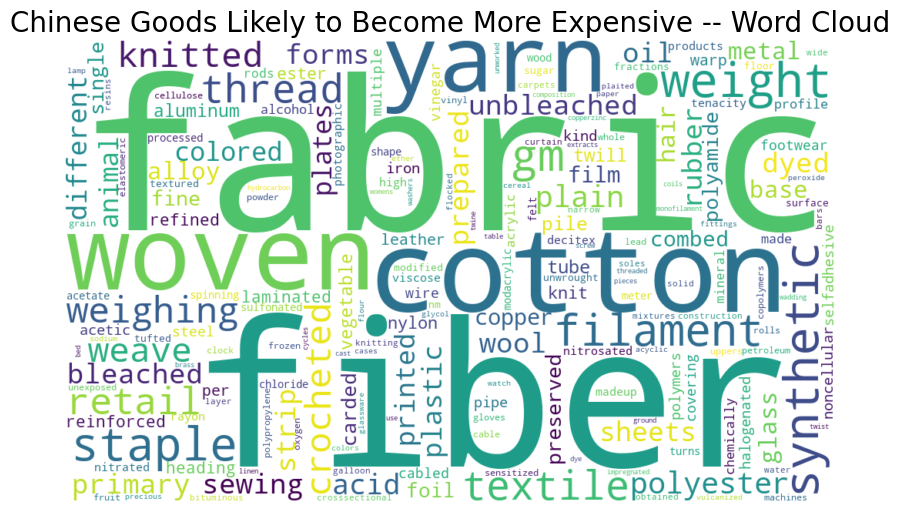

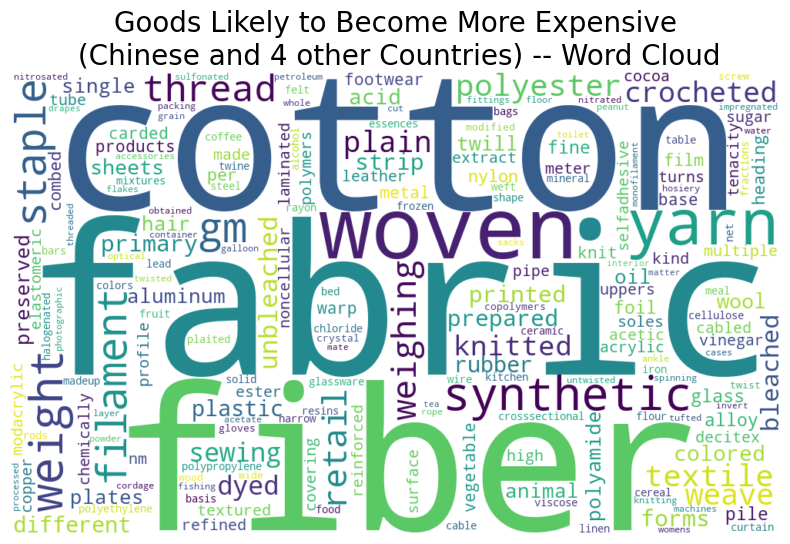

In [106]:
# Converted to markdown to keep the code, but not running this cell
from wordcloud import WordCloud, STOPWORDS
import re

# Viz prediction
data_variants = [
    (chn_pred, "Chinese Goods Likely to Become More Expensive -- Word Cloud"),
    (goods_pred, "Goods Likely to Become More Expensive\n (Chinese and 4 other Countries) -- Word Cloud")
]

for pred_data, title in data_variants:
	cols_to_drop = ['HTS Number', 'label', 'predict'] + [col for col in pred_data.columns if col.startswith("RPC")]
	pred_data = pred_data.drop(columns=cols_to_drop, axis=1, errors='ignore')

	# Combine all descriptions into a single string
	text = ' '.join(pred_data['Description'].dropna().astype(str))
	# Add custom stopwords (e.g., "NESOI", "PARTS", "OF")
	custom_stopwords = set(STOPWORDS)
	custom_stopwords.update([
    "nesoi", "parts", "articles", "thereof", "containing", "other", "than", "with", "whether", "but",
		"not", "put", "sale", "etc", "mm", "cm", "of", "for", "the", "and", "or", "function", "preparation",
		"endless", "similar", "exceeding", "derivatives", "salts", "preparations", "thick", "additional",
		"including", "fixed", "rectangular", "output", "square", "removable", "mixed", "one", "maximum",
		"compounds", "except", "rolled", "electric", "nonelectric", "w", "color", "synchronous", ".", "a",
    "selfcontained", "saturated", "covered","nonelectrical", "upright", "worked", "form", "upper", "less",
    "used", "concentrates", "without", "goods", "width", "dimension", "materials", "manmade","artificial",
    "added", "piece", "outer", "wt", "cross", "coated", "excluding", "mainly", "pure"
	])
	# Clean text (remove punctuation, digits)
	text_cleaned = re.sub(r"[^A-Za-z\s]", "", text)  # remove punctuation/numbers
	text_cleaned = text_cleaned.lower()

	# Create and configure word cloud
	# Generate word cloud
	wordcloud = WordCloud(
			width=1000,
			height=600,
			background_color='white',
			stopwords=custom_stopwords,
			max_words=200,
			collocations=False
	).generate(text_cleaned)

	# Plot
	plt.figure(figsize=(12, 6))
	plt.imshow(wordcloud, interpolation='bilinear')
	plt.axis('off')
	plt.title(title, fontsize=20)
	plt.show()

In [107]:
# from collections import Counter
# from wordcloud import WordCloud, STOPWORDS
# import re

# # Combine and clean descriptions
# def clean_text(series):
#     text = ' '.join(series.dropna().astype(str))
#     text = re.sub(r"[^A-Za-z\s]", "", text).lower()
#     text = text.title()
#     return text.split()

# # Clean text for Chinese and other countries
# words_china = clean_text(chn_pred['Description'])
# words_others = clean_text(goods_pred['Description'])

# # Get frequency counts
# freq_china = Counter(words_china)
# freq_others = Counter(words_others)
# all_words = set(freq_china) | set(freq_others)

# # Compute Chinese dominance ratio
# dominance = {
#     word: freq_china[word] / (freq_china[word] + freq_others.get(word, 0.1))
#     for word in all_words
# }

# # Merge all words for final cloud
# all_text = ' '.join(words_others)  # other countries' words

# # Define excluded words (not specific to product types)
# custom_stopwords = set(STOPWORDS)
# custom_stopwords.update([
#     "nesoi", "parts", "articles", "thereof", "containing", "other", "than", "with", "whether", "but",
# 	"not", "put", "sale", "etc", "mm", "cm", "of", "for", "the", "and", "or", "function", "preparation",
# 	"endless", "similar", "exceeding", "derivatives", "salts", "preparations", "thick", "additional",
# 	"including", "fixed", "rectangular", "output", "square", "removable", "mixed", "one", "maximum",
# 	"compounds", "except", "rolled", "electric", "nonelectric", "w", "color", "synchronous", ".", "a",
#     "selfcontained", "saturated", "covered","nonelectrical", "upright", "worked", "form", "upper", "less",
#     "used", "concentrates", "without", "goods", "width", "dimension", "materials", "manmade","artificial",
#     "added", "piece", "outer"
# ])

# # Create word cloud
# wc = WordCloud(
#     width=1000,
#     height=600,
#     background_color='white',
#     stopwords=custom_stopwords,
#     collocations=False,
#     max_words=200,
#     random_state=42
# ).generate(all_text)

# # Define custom color function
# def red_blue_shade_color_func(word, **kwargs):
#     dom = dominance.get(word.title(), 0)    # dominance from Chinese imports
#     red_intensity = int(255 * dom)          # red = more Chinese-dominant
#     blue = int(255 * (1 - 2*dom))             # blue = more other-country-dominant
#     return f"rgb({red_intensity}, 0, {blue})"

# # Recolor with dominance
# wc_colored = wc.recolor(color_func=red_blue_shade_color_func)

# # Plot
# plt.figure(figsize=(12, 6))
# plt.imshow(wc_colored, interpolation="bilinear")
# plt.axis('off')
# plt.title("Imported Goods Likely to Become More Expensive (Chinese--more in Red)", fontsize=18, pad=20)
# plt.tight_layout()
# plt.savefig("figure/highlighted_chinese_goods_wordcloud.png", dpi=300, bbox_inches='tight')
# plt.show()


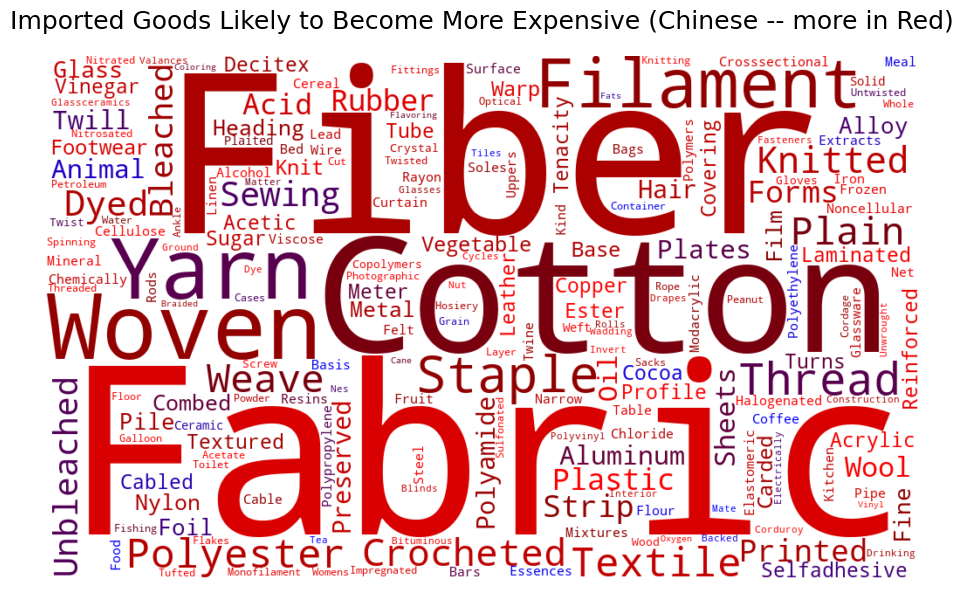

In [110]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re


# Updated word weighting using total quantity
def get_weighted_word_list(df):
    word_weights = Counter()
    for _, row in df.iterrows():
        words = re.sub(r"[^A-Za-z\s]", "", row['Description']).lower().title().split()
        quantity = row['First Unit of Quantity']
        for word in words:
            word_weights[word] += quantity
    return word_weights

freq_china = get_weighted_word_list(goods_pred[goods_pred['Country_china'] == 1])
freq_others = get_weighted_word_list(goods_pred[goods_pred['Country_china'] == 0])
all_words = set(freq_china) | set(freq_others)

# Compute dominance ratio (quantity-based)
dominance = {
    word: freq_china[word] / (freq_china[word] + freq_others.get(word, 0.1))
    for word in all_words
}

# Merge all descriptions for word cloud text
all_text = ' '.join(goods_pred['Description'].astype(str).tolist())
all_text = re.sub(r"[^A-Za-z\s]", "", all_text).lower().title()

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
	"nesoi", "parts", "articles", "thereof", "containing", "other", "than", "with", "whether", "but",
	"not", "put", "sale", "etc", "mm", "cm", "of", "for", "the", "and", "or", "function", "preparation",
	"endless", "similar", "exceeding", "derivatives", "salts", "preparations", "thick", "additional",
	"including", "fixed", "rectangular", "output", "square", "removable", "mixed", "one", "maximum",
	"compounds", "except", "rolled", "electric", "nonelectric", "w", "color", "synchronous", ".", "a",
	"selfcontained", "saturated", "covered","nonelectrical", "upright", "worked", "form", "upper", "less",
	"used", "concentrates", "without", "goods", "width", "dimension", "materials", "manmade","artificial",
	"added", "piece", "outer", "wt", "cross", "coated", "excluding", "mainly", "pure", "different", "prepared",
    "retail", "weight", "gm", "per", "synthetic", "colored", "made", "machines", "modified", "kg", "applied",
    "madeup", "products","packing", "accessories", "fractions", "obtained", "example", "instruments",
    "purposes", "uncut", "refined","stat", "mixture", "precious", "colors", "weighing", "extract", "wide",
    "nm", "multiple", "primary", "high", "shape", "processed", "shapes", "single", "mixture"
])

# Create word cloud
wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=custom_stopwords,
    collocations=False,
    max_words=200,
    random_state=42
).generate(all_text)

# Custom color function
def red_blue_shade_color_func(word, **kwargs):
    dom = dominance.get(word.title(), 0)
    red_intensity = int(255 * dom)
    blue = int(255 * (1 - 2 * dom)) if dom < 0.5 else 0
    return f"rgb({red_intensity}, 0, {blue})"

# Recolor and plot
wc_colored = wc.recolor(color_func=red_blue_shade_color_func)
plt.figure(figsize=(12, 6))
plt.imshow(wc_colored, interpolation="bilinear")
plt.axis('off')
plt.title("Imported Goods Likely to Become More Expensive (Chinese -- more in Red)", fontsize=18, pad=20)
plt.tight_layout()
plt.savefig("../figures/highlighted_chinese_goods_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()
